In [1]:
import jupyter_black
jupyter_black.load()

These tutorials are written to help a practitioner get familiar with some of the common functionalities that most reserving actuaries will perform in their day-to-day responsibilities that are provided by the `chainladder` package. We will be using  datasets that come included with the package, allowing one to follow and reproduce the results as shown here.

Keep in mind that these tutorials were written to only demonstrate the functionalities of the package, and the end user should always follow all applicable laws, the Code of Professional Conduct, Actuarial Standards of Practice, and exercise their best actuarial judgement. These tutorials are not written in a way to encourage certain workflow, or recommendation for analyzing a dataset or rendering an actuarial opinion.

The tutorials assume that you have the basic understanding of commonly used actuarial terms, and can independently perform an actuarial analysis in another tool, such as Microsoft Excel or another actuarial software. Furthermore, it is assumed that you already have some familiarity with Python, and that you have the basic knowledge and experience in using some common packages that are popular in the Python community, such as `pandas` and `numpy`. In addition, we will not cover installation or setting up a development environment, as those tasks are well documented on the web and our documentation site, chainladder-python.readthedocs.io. Furthermore, as with all software, updates will impact the functionality of the package overtime, and this guide might lose its usefulness as it ages. Please refer to the documentation site for the most up-to-date guides.

All tutorials and exercises rely on `chainladder` v0.8.19 and `pandas` v2.2.1 or later. If you have trouble reconciling the results from your workflow to this tutorial, you should verify the versions of the packages installed in your work environment and check the release notes in case updates are issued subsequently.

In [2]:
import pandas as pd
import numpy as np
import chainladder as cl

print("chainladder: " + cl.__version__)
print("pandas: " + pd.__version__)
print("numpy: " + np.__version__)

chainladder: 0.8.20
pandas: 2.2.2
numpy: 1.24.3


# Working with Triangles

## Importing Data

Let's begin by looking at a raw triangle dataset and load it into a `pandas.DataFrame`. We'll use the data `raa`, which is available from the repository. Note that this dataset is currently in `csv` format.

In [3]:
raa_df = pd.read_csv(
    "https://raw.githubusercontent.com/casact/chainladder-python/master/chainladder/utils/data/raa.csv"
)
raa_df.head(20)

,development,origin,values
0,1981,1981,5012.0
1,1982,1982,106.0
2,1983,1983,3410.0
3,1984,1984,5655.0
4,1985,1985,1092.0
5,1986,1986,1513.0
6,1987,1987,557.0
7,1988,1988,1351.0
8,1989,1989,3133.0
9,1990,1990,2063.0


The dataset has three columns: 

* `development`: or valuation time, in this case, the valuation year.
* `origin`: or accident date, in this case, the accident year.
* `values`: the values recorded for the specific accident date at the specific valuation time (such as incurred losses, paid losses, or claim counts), in this case, these are just "values" within the triangle, and has no specific metric unit associated with them.

A table of loss experience showing total losses for a certain period (origin) at various, regular valuation dates (development), reflects the change in amounts as claims mature and emerge. Older periods in the table will have one more entry than the next youngest period, leading to the triangle shape of the data in the table or any other measure that matures over time from an origin date. Loss triangles can be used to determine loss development for a given risk.

Let's put our data into the `chainladder.Triangle` format.

In [4]:
raa = cl.Triangle(
    data=raa_df,
    origin="origin",
    development="development",
    columns="values",
    cumulative=True,
)
raa

,12,24,36,48,60,72,84,96,108,120
1981,"5,012","8,269","10,907","11,805","13,539","16,181","18,009","18,608","18,662","18,834"
1982,106,"4,285","5,396","10,666","13,782","15,599","15,496","16,169","16,704",
1983,"3,410","8,992","13,873","16,141","18,735","22,214","22,863","23,466",,
1984,"5,655","11,555","15,766","21,266","23,425","26,083","27,067",,,
1985,"1,092","9,565","15,836","22,169","25,955","26,180",,,,
1986,"1,513","6,445","11,702","12,935","15,852",,,,,
1987,557,"4,020","10,946","12,314",,,,,,
1988,"1,351","6,947","13,112",,,,,,,
1989,"3,133","5,395",,,,,,,,
1990,"2,063",,,,,,,,,


In the above example,

* `data` is the single `DataFrame` that contains columns representing all other arguments to the Triangle constructor. In our example, the dataset `raa_df`.
* `origin` is the representation of the accident, reporting, or more generally, the origin period of the triangle that will map to the `origin` dimension. In our example, the `origin` column.
* `development` is the representation of the development or valuation periods of the triangle that will map to the `development` dimension. In our example, the `development` column.
* `columns` is the representation of the numeric data of the triangle that will map to the `columns` dimension. If `None`, then a single 'Total' key will be generated. In our example, the `values` column.
* `columuative` is the indicator of whether the triangle is cumulative or incremental. In our example, while it is not super obvious from looking at the raw data, our triangle dataset is actually a cumulative triangle. So we'll set this to `True`.
  
## Triangles Attributes

Now that we have our `Triangle` object declared within the `chainladder` package, we can get a lot of its attributes. First, let's get the latest diagonal of the Triangle with `.latest_diagonal`.

In [5]:
raa.latest_diagonal

,1990
1981,"18,834"
1982,"16,704"
1983,"23,466"
1984,"27,067"
1985,"26,180"
1986,"15,852"
1987,"12,314"
1988,"13,112"
1989,"5,395"
1990,"2,063"


Another attribute that is commonly used is `.link_ratio` to get the LDFs of the triangle.

In [6]:
raa.link_ratio

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120
1981,1.6498,1.3190,1.0823,1.1469,1.1951,1.1130,1.0333,1.0029,1.0092
1982,40.4245,1.2593,1.9766,1.2921,1.1318,0.9934,1.0434,1.0331,
1983,2.6370,1.5428,1.1635,1.1607,1.1857,1.0292,1.0264,,
1984,2.0433,1.3644,1.3489,1.1015,1.1135,1.0377,,,
1985,8.7592,1.6556,1.3999,1.1708,1.0087,,,,
1986,4.2597,1.8157,1.1054,1.2255,,,,,
1987,7.2172,2.7229,1.1250,,,,,,
1988,5.1421,1.8874,,,,,,,
1989,1.7220,,,,,,,,


A useful feature is the `.heatmap()` method, which highlights the highs and lows within each column.

In [7]:
raa.link_ratio.heatmap()

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120
1981,1.6498,1.3190,1.0823,1.1469,1.1951,1.1130,1.0333,1.0029,1.0092
1982,40.4245,1.2593,1.9766,1.2921,1.1318,0.9934,1.0434,1.0331,
1983,2.6370,1.5428,1.1635,1.1607,1.1857,1.0292,1.0264,,
1984,2.0433,1.3644,1.3489,1.1015,1.1135,1.0377,,,
1985,8.7592,1.6556,1.3999,1.1708,1.0087,,,,
1986,4.2597,1.8157,1.1054,1.2255,,,,,
1987,7.2172,2.7229,1.1250,,,,,,
1988,5.1421,1.8874,,,,,,,
1989,1.7220,,,,,,,,


Here are some other attributes that might be useful to the practitioner:

* `is_cumulative`: boolean, returns True if the data across the development periods is cumulative, or False if it is incremental.
* `is_ultimate`: boolean, returns True if the ultimate values are projected for the triangle.
* `is_val_tri`: boolean, returns True if the development period is stated as a valuation data as opposed to an age. i.e. Schedule P styled triangle (True) or the more commonly used triangle by development age (False).
* `is_full`: boolean, returns True if the triangle has been "squared".

In [8]:
print("Is triangle cumulative?", raa.is_cumulative)
print("Does triangle contain ultimate projections?", raa.is_ultimate)
print("Is this a valuation triangle?", raa.is_val_tri)
print('Has the triangle been "squared"?', raa.is_full)

Is triangle cumulative? True
Does triangle contain ultimate projections? False
Is this a valuation triangle? False
Has the triangle been "squared"? False


We can also inspect the triangle to understand its data granularity with `origin_grain` and `development_grain`. The supported `grains` are:

* Monthly: denoted with `M`.
* Quarterly: denoted with `Q`.
* Semi-annually: denoted with `S`.
* Annually: denoted with `Y`.

In [9]:
print("Origin grain:", raa.origin_grain)
print("Development grain:", raa.development_grain)

Origin grain: Y
Development grain: Y


## Manipulating Triangles
There are also useful methods to convert an cumulative triangle into an incremental one with `.cum_to_incr()`.

In [10]:
raa.cum_to_incr()

,12,24,36,48,60,72,84,96,108,120
1981,"5,012","3,257","2,638",898,"1,734","2,642","1,828",599,54,172
1982,106,"4,179","1,111","5,270","3,116","1,817",-103,673,535,
1983,"3,410","5,582","4,881","2,268","2,594","3,479",649,603,,
1984,"5,655","5,900","4,211","5,500","2,159","2,658",984,,,
1985,"1,092","8,473","6,271","6,333","3,786",225,,,,
1986,"1,513","4,932","5,257","1,233","2,917",,,,,
1987,557,"3,463","6,926","1,368",,,,,,
1988,"1,351","5,596","6,165",,,,,,,
1989,"3,133","2,262",,,,,,,,
1990,"2,063",,,,,,,,,


You can also convert an incremental triangle to a cumuative one with `.incr_to_cum()`.

In [11]:
raa.cum_to_incr().incr_to_cum()

,12,24,36,48,60,72,84,96,108,120
1981,"5,012","8,269","10,907","11,805","13,539","16,181","18,009","18,608","18,662","18,834"
1982,106,"4,285","5,396","10,666","13,782","15,599","15,496","16,169","16,704",
1983,"3,410","8,992","13,873","16,141","18,735","22,214","22,863","23,466",,
1984,"5,655","11,555","15,766","21,266","23,425","26,083","27,067",,,
1985,"1,092","9,565","15,836","22,169","25,955","26,180",,,,
1986,"1,513","6,445","11,702","12,935","15,852",,,,,
1987,557,"4,020","10,946","12,314",,,,,,
1988,"1,351","6,947","13,112",,,,,,,
1989,"3,133","5,395",,,,,,,,
1990,"2,063",,,,,,,,,


Another useful one is to convert a development triangle to a valuation triangle (Schedule P style), with `.dev_to_val()`.

In [12]:
raa.dev_to_val()

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
1981,"5,012","8,269","10,907","11,805","13,539","16,181","18,009","18,608","18,662","18,834"
1982,,106,"4,285","5,396","10,666","13,782","15,599","15,496","16,169","16,704"
1983,,,"3,410","8,992","13,873","16,141","18,735","22,214","22,863","23,466"
1984,,,,"5,655","11,555","15,766","21,266","23,425","26,083","27,067"
1985,,,,,"1,092","9,565","15,836","22,169","25,955","26,180"
1986,,,,,,"1,513","6,445","11,702","12,935","15,852"
1987,,,,,,,557,"4,020","10,946","12,314"
1988,,,,,,,,"1,351","6,947","13,112"
1989,,,,,,,,,"3,133","5,395"
1990,,,,,,,,,,"2,063"


And of course, you can convert it back with `.val_to_dev()`.

In [13]:
raa.dev_to_val().val_to_dev()

,12,24,36,48,60,72,84,96,108,120
1981,"5,012","8,269","10,907","11,805","13,539","16,181","18,009","18,608","18,662","18,834"
1982,106,"4,285","5,396","10,666","13,782","15,599","15,496","16,169","16,704",
1983,"3,410","8,992","13,873","16,141","18,735","22,214","22,863","23,466",,
1984,"5,655","11,555","15,766","21,266","23,425","26,083","27,067",,,
1985,"1,092","9,565","15,836","22,169","25,955","26,180",,,,
1986,"1,513","6,445","11,702","12,935","15,852",,,,,
1987,557,"4,020","10,946","12,314",,,,,,
1988,"1,351","6,947","13,112",,,,,,,
1989,"3,133","5,395",,,,,,,,
1990,"2,063",,,,,,,,,


## 4-D Triangle

The triangle described so far is a two-dimensional (accident date by valuation date) structure that spans multiple cells of data. This is a useful structure for exploring individual triangles, but becomes more problematic when working with **sets** of triangles. As in a prior chapter, we discussed the usefulness of 4-D triangle objects. `Pandas` does not have a triangle `dtype`, but if it did, working with sets of triangles would be much more convenient. To facilitate working with more than one triangle at a time,  `chainladder.Triangle` acts like a `pandas.DataFrame` (with an index and columns) where each cell (row x col) is an individual triangle. This structure manifests itself as a four-dimensional space.

Let's take a look at another sample dataset, `clrd`, which can be used as a 4-D triangle.

In [14]:
clrd_df = pd.read_csv(
    "https://raw.githubusercontent.com/casact/chainladder-python/master/chainladder/utils/data/clrd.csv"
)
clrd_df.head()

,GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss,CumPaidLoss,BulkLoss,EarnedPremDIR,EarnedPremCeded,EarnedPremNet,Single,PostedReserve97,LOB
0,86,Allstate Ins Co Grp,1988,1988,1,367404,70571,127737,400699,5957,394742,0,281872,wkcomp
1,86,Allstate Ins Co Grp,1988,1989,2,362988,155905,60173,400699,5957,394742,0,281872,wkcomp
2,86,Allstate Ins Co Grp,1988,1990,3,347288,220744,27763,400699,5957,394742,0,281872,wkcomp
3,86,Allstate Ins Co Grp,1988,1991,4,330648,251595,15280,400699,5957,394742,0,281872,wkcomp
4,86,Allstate Ins Co Grp,1988,1992,5,354690,274156,27689,400699,5957,394742,0,281872,wkcomp


Let's load the data into the sets of triangles.

In [15]:
clrd = cl.Triangle(
    data=clrd_df,
    origin="AccidentYear",
    development="DevelopmentYear",
    columns=[
        "IncurLoss",
        "CumPaidLoss",
        "BulkLoss",
        "EarnedPremDIR",
        "EarnedPremCeded",
        "EarnedPremNet",
    ],
    index=["GRNAME", "LOB"],
    cumulative=True,
)
clrd

,Triangle Summary
Valuation:,1997-12
Grain:,OYDY
Shape:,"(775, 6, 10, 10)"
Index:,"[GRNAME, LOB]"
Columns:,"[IncurLoss, CumPaidLoss, BulkLoss, EarnedPremDIR, EarnedPremCeded, EarnedPremNet]"


In this example, `data`, `origin`, `development`, and `cumulative` are all no different from what we had done before with the `raa` dataset. But, we need to use `columns` a bit differently, and also, declare a new variable, `index`.

* `columns` is the list of "triangles" metrics that we will have. Think of this as the type of triangle metrics that we can use to describe a segment. For example, they can be Paid, Incurred, Closed Claim counts, or even exposure data. Note that while exposure data do not develop over time commonly, they can still be presented in a triangle format. In our example dataset, `IncurLoss` is financial incurred loss (not just reported, as in paid + case + IBNR), `CumPaidLoss` for paid loss, `BulkLoss` for case reserves, `EarnedPremDIR` for direct and assumed premium earned, `EarnedPremCeded` for ceded premium earned, and `EarnedPremNet` for the net premium earned.
* `index` is can be thought of as portfolio or business segments. In our example, it's a combination of `GRNAME`, the Company Name, and `LOB`, the line of business.

Since 4D structures do not fit nicely on 2D screens, we see a summary view instead that describes the structure rather than the underlying data itself. 

We see 5 rows of information:
* `Valuation`: the valuation date.
* `Grain`: the granularity of the data, `O` stands for origin, and `D` stands for development, `OYDY` represents triangles with accident year by development year.
* `Shape`: contains 4 numbers, represents the 4-D structure. 
    * 775: the number of segments, which is the combination of `index`, that represents the data segments. In this case, it is each of the `GRNAME` and `LOB` combination.
    * 6: the number of triangles for each segment, which is also the columns `[IncurLoss, CumPaidLoss, BulkLoss, EarnedPremDIR, EarnedPremCeded, EarnedPremNet]`.
    * 10: the number of accident periods.
    * 10: the number of valuation periods.
    * This sample triangle represents a collection of 775x6 or 4,650 triangles that are themselves 10 accident years by 10 development periods.
* `Index`: the segmentation level of the triangles.
* `Columns`: the value types recorded in the triangles.

Now we have a 4D triangle, let's do some `pandas`-style operations. 

First, let's try filtering.

In [16]:
clrd[clrd["LOB"] == "wkcomp"]

,Triangle Summary
Valuation:,1997-12
Grain:,OYDY
Shape:,"(132, 6, 10, 10)"
Index:,"[GRNAME, LOB]"
Columns:,"[IncurLoss, CumPaidLoss, BulkLoss, EarnedPremDIR, EarnedPremCeded, EarnedPremNet]"


Note that only the shape changed, from `(775, 6, 10, 10)` to `(132, 6, 10, 10)`.

`pandas` has the `.loc` feature, which is available in `chainladder`, too. Let's use `.loc` to filter by index name.

In [17]:
clrd.loc["Allstate Ins Co Grp"]

,Triangle Summary
Valuation:,1997-12
Grain:,OYDY
Shape:,"(2, 6, 10, 10)"
Index:,[LOB]
Columns:,"[IncurLoss, CumPaidLoss, BulkLoss, EarnedPremDIR, EarnedPremCeded, EarnedPremNet]"


Let's see what LOBs `Allstate Ins Co Grp` writes.

In [18]:
clrd.loc["Allstate Ins Co Grp"].index

,LOB
0,prodliab
1,wkcomp


Since we have `.loc`, we must also have `.iloc`, which stands for by index location. You can even chain them together. 

Let's get `Allstate Ins Co Grp`'s `prodliab` by calling `iloc[0]` and get the `CumPaidLoss` triangle.

In [19]:
clrd.loc["Allstate Ins Co Grp"].iloc[0]["CumPaidLoss"]

,12,24,36,48,60,72,84,96,108,120
1988,"1,501","3,916","8,834","17,450","22,495","28,687","31,311","32,039","36,357","36,358"
1989,"1,697","5,717","10,442","18,125","23,284","30,092","34,338","41,094","41,164",
1990,"1,373","4,002","10,829","16,695","21,788","25,332","34,875","34,893",,
1991,"1,069","4,594","6,920","9,996","13,249","19,221","19,256",,,
1992,"1,134","3,068","5,412","8,210","19,164","19,187",,,,
1993,979,"3,079","6,407","16,113","16,131",,,,,
1994,"1,397","2,990","25,688","26,030",,,,,,
1995,"1,016","21,935","22,095",,,,,,,
1996,"9,852","10,071",,,,,,,,
1997,319,,,,,,,,,


`iloc[...]` actually can take in 4 parameters, which are `index`, `columns`, `origin`, and `development`. For example, if we want `Allstate Ins Co Grp`'s `prodliab` index, we can search for it first, then call the indices of `CumPaidLoss`, and origin `1990`.

In [20]:
clrd.index[clrd.index["GRNAME"] == "Allstate Ins Co Grp"]

,GRNAME,LOB
21,Allstate Ins Co Grp,prodliab
22,Allstate Ins Co Grp,wkcomp


In [21]:
clrd

,Triangle Summary
Valuation:,1997-12
Grain:,OYDY
Shape:,"(775, 6, 10, 10)"
Index:,"[GRNAME, LOB]"
Columns:,"[IncurLoss, CumPaidLoss, BulkLoss, EarnedPremDIR, EarnedPremCeded, EarnedPremNet]"


Now we are ready. The four indices are:
* `index` = `21`, as shown from `clrd.index[clrd.index["GRNAME"] == "Allstate Ins Co Grp"]`.
* `columns` = `1`, because `IncurLoss` is 0, `CumPaidLoss` is 1, etc.
* `origin` = `2`, because the years start in `1988`, which is index 0.
* `development` = `:`, we use `:` to indicate "all" development periods.

In [22]:
clrd.iloc[21, 1, 2, :]

,12,24,36,48,60,72,84,96,108,120
1990,"1,373","4,002","10,829","16,695","21,788","25,332","34,875","34,893",,


We can also use other `pandas` filter functions. For example, getting the four `CumPaidLoss` diagonals between `1990` and `1993` with the help of `.valuation`.

In [23]:
paid_tri = clrd.iloc[21, 1, :, :]
paid_tri[(paid_tri.valuation >= "1990") & (paid_tri.valuation < "1994")]["CumPaidLoss"]

,12,24,36,48,60,72
1988,,,"8,834","17,450","22,495","28,687"
1989,,"5,717","10,442","18,125","23,284",
1990,"1,373","4,002","10,829","16,695",,
1991,"1,069","4,594","6,920",,,
1992,"1,134","3,068",,,,
1993,979,,,,,


Another commonly used filter is `.development`, let's get the three columns between age 36 and age 60.

In [24]:
paid_tri[(paid_tri.development >= 36) & (paid_tri.development <= 60)]

,36,48,60
1988,"8,834","17,450","22,495"
1989,"10,442","18,125","23,284"
1990,"10,829","16,695","21,788"
1991,"6,920","9,996","13,249"
1992,"5,412","8,210","19,164"
1993,"6,407","16,113","16,131"
1994,"25,688","26,030",
1995,"22,095",,
1996,,,
1997,,,


With complete flexibility in the ability to slice subsets of triangles, we can use basic arithmetic to derive new triangles, which are commonly used as diagnostics to explore trends. Recall that `IncurLoss` is actually financial incurred, which includes paid + case + IBNR. Let's derive a new column, `CaseIncurLoss`, that is actually just paid + case, but without the IBNR.

In [25]:
clrd["CaseIncurLoss"] = clrd["IncurLoss"] - clrd["BulkLoss"]
clrd["CaseIncurLoss"]

,Triangle Summary
Valuation:,1997-12
Grain:,OYDY
Shape:,"(775, 1, 10, 10)"
Index:,"[GRNAME, LOB]"
Columns:,[CaseIncurLoss]


Note that even though `clrd["CaseIncurLoss"]` is declared as a new single variable, it actually comes with all 775 "indexes", i.e. we have 775 `clrd["CaseIncurLoss"]` triangles. But we can use `.sum()` to see the sum of them.

In [26]:
clrd["CaseIncurLoss"].sum()

,12,24,36,48,60,72,84,96,108,120
1988,"7,778,398","9,872,876","10,537,707","10,973,808","11,175,391","11,265,524","11,288,288","11,305,023","11,323,995","11,327,627"
1989,"8,734,319","10,844,720","11,822,136","12,279,311","12,481,505","12,567,543","12,608,487","12,633,539","12,639,258",
1990,"9,325,252","11,913,461","12,985,113","13,459,843","13,646,077","13,718,445","13,755,879","13,768,960",,
1991,"9,564,486","12,159,826","13,216,383","13,659,541","13,821,032","13,903,084","13,964,163",,,
1992,"10,539,619","13,125,930","14,120,971","14,563,964","14,755,405","14,850,140",,,,
1993,"11,402,448","14,043,343","15,095,232","15,576,086","15,775,057",,,,,
1994,"12,411,107","15,005,424","16,095,699","16,650,937",,,,,,
1995,"12,686,394","15,140,099","16,223,016",,,,,,,
1996,"12,627,293","14,956,778",,,,,,,,
1997,"12,705,993",,,,,,,,,


Let's look at the (sum of) Paid to (sum of) Incurred ratio triangle. Does it look like the ratios are changing over time? Using `.heatmap()` usually helps with spotting trends.

In [27]:
(clrd["CumPaidLoss"].sum() / clrd["CaseIncurLoss"].sum()).heatmap()

,12,24,36,48,60,72,84,96,108,120
1988,0.4600,0.7151,0.8376,0.8987,0.9373,0.9600,0.9739,0.9811,0.9865,0.9891
1989,0.4683,0.7344,0.8406,0.9038,0.9427,0.9643,0.9765,0.9843,0.9884,
1990,0.4910,0.7394,0.8460,0.9086,0.9438,0.9650,0.9780,0.9848,,
1991,0.4860,0.7370,0.8440,0.9085,0.9473,0.9672,0.9770,,,
1992,0.4876,0.7434,0.8518,0.9125,0.9483,0.9661,,,,
1993,0.4958,0.7548,0.8581,0.9176,0.9512,,,,,
1994,0.5033,0.7594,0.8602,0.9158,,,,,,
1995,0.5103,0.7670,0.8636,,,,,,,
1996,0.5220,0.7671,,,,,,,,
1997,0.5078,,,,,,,,,


Compare the result to `(clrd["CumPaidLoss"] / clrd["CaseIncurLoss"]).sum()`, which looks odd, why is that? This is because we are summing the quotients of paid losses over incurred losses at each index.

In [28]:
(clrd["CumPaidLoss"] / clrd["CaseIncurLoss"]).sum()

,12,24,36,48,60,72,84,96,108,120
1988,183.17,292.57,331.87,398.92,494.88,473.44,485.36,490.86,489.80,491.31
1989,200.69,303.32,373.15,420.30,463.58,484.43,497.13,505.38,503.29,
1990,215.34,369.60,378.76,476.51,518.93,505.84,513.90,520.72,,
1991,164.69,327.69,396.14,444.79,485.42,503.48,514.19,,,
1992,218.25,340.39,411.63,476.67,499.92,516.52,,,,
1993,231.65,353.00,423.39,483.57,517.40,,,,,
1994,235.05,355.94,436.77,498.18,,,,,,
1995,235.37,369.36,445.79,,,,,,,
1996,245.99,384.58,,,,,,,,
1997,268.78,,,,,,,,,


## Triangle Adjustments

Another adjustment we can make to the triangle is to apply a trend. We can do that by calling `chainladder.Trend()`, which is actually an estimator. It takes in a few variables:
- `trends`: the list containing the annual trends expressed as a decimal. For example, 5% decrease should be stated as -0.05.
- `dates`: a list-like of (start, end) dates to correspond to the trend list.
- `axis` (options: [`origin`, `valuation`]): the axis on which to apply the trend.

Let's say we want a 5% trend from `1992-12-31` to `1991-01-01`. You can then call `.trend_` attribute to view the trend factors.

In [29]:
trend_factors = (
    cl.Trend(trends=[0.05], dates=[("1992-12-31", "1991-01-01")], axis="origin")
    .fit(clrd["CumPaidLoss"].sum())
    .trend_
)
trend_factors

,12,24,36,48,60,72,84,96,108,120
1988,1.0980,1.0980,1.0980,1.0980,1.0980,1.0980,1.0980,1.0980,1.0980,1.0980
1989,1.0980,1.0980,1.0980,1.0980,1.0980,1.0980,1.0980,1.0980,1.0980,
1990,1.0980,1.0980,1.0980,1.0980,1.0980,1.0980,1.0980,1.0980,,
1991,1.0500,1.0500,1.0500,1.0500,1.0500,1.0500,1.0500,,,
1992,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,,,,
1993,1.0000,1.0000,1.0000,1.0000,1.0000,,,,,
1994,1.0000,1.0000,1.0000,1.0000,,,,,,
1995,1.0000,1.0000,1.0000,,,,,,,
1996,1.0000,1.0000,,,,,,,,
1997,1.0000,,,,,,,,,


Then we can apply the `trend_factors` to get our trended loss triangle.

In [30]:
clrd["CumPaidLoss"].sum() * trend_factors

,12,24,36,48,60,72,84,96,108,120
1988,"3,928,497","7,752,030","9,691,348","10,829,492","11,501,496","11,874,691","12,071,719","12,178,611","12,266,702","12,302,233"
1989,"4,491,675","8,745,454","10,911,660","12,186,544","12,919,916","13,306,753","13,518,495","13,653,769","13,717,534",
1990,"5,027,251","9,671,951","12,062,202","13,427,767","14,140,984","14,536,407","14,771,743","14,888,753",,
1991,"4,881,194","9,409,843","11,711,956","13,030,072","13,746,639","14,119,855","14,324,535",,,
1992,"5,139,142","9,757,699","12,027,983","13,289,485","13,992,821","14,347,271",,,,
1993,"5,653,379","10,599,423","12,953,812","14,292,516","15,005,138",,,,,
1994,"6,246,447","11,394,960","13,845,764","15,249,326",,,,,,
1995,"6,473,843","11,612,151","14,010,098",,,,,,,
1996,"6,591,599","11,473,912",,,,,,,,
1997,"6,451,896",,,,,,,,,


Multipart trend is also possible, since `trends` and `dates` can accept lists.

In [31]:
cl.Trend(
    trends=[0.05, -0.10],
    dates=[("1992-12-31", "1991-01-01"), ("1990-12-31", "1989-01-01")],
    axis="origin",
).fit(clrd["CumPaidLoss"].sum()).trend_

,12,24,36,48,60,72,84,96,108,120
1988,0.8972,0.8972,0.8972,0.8972,0.8972,0.8972,0.8972,0.8972,0.8972,0.8972
1989,0.9882,0.9882,0.9882,0.9882,0.9882,0.9882,0.9882,0.9882,0.9882,
1990,1.0980,1.0980,1.0980,1.0980,1.0980,1.0980,1.0980,1.0980,,
1991,1.0500,1.0500,1.0500,1.0500,1.0500,1.0500,1.0500,,,
1992,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,,,,
1993,1.0000,1.0000,1.0000,1.0000,1.0000,,,,,
1994,1.0000,1.0000,1.0000,1.0000,,,,,,
1995,1.0000,1.0000,1.0000,,,,,,,
1996,1.0000,1.0000,,,,,,,,
1997,1.0000,,,,,,,,,


`chainladder.Triangle()` objects are awesome, but what if you need to get back out to `pandas`? `.to_frame()` is a very handy method to know. It converts the `chainladder.Triangle()` object back to a `pandas.DataFrame()` object.

In [32]:
clrd["CumPaidLoss"].sum().to_frame()

,12,24,36,48,60,72,84,96,108,120
1988-01-01,3577780.0,7059966.0,8826151.0,9862687.0,10474698.0,10814576.0,10994014.0,11091363.0,11171590.0,11203949.0
1989-01-01,4090680.0,7964702.0,9937520.0,11098588.0,11766488.0,12118790.0,12311629.0,12434826.0,12492899.0,NaN
1990-01-01,4578442.0,8808486.0,10985347.0,12229001.0,12878545.0,13238667.0,13452993.0,13559557.0,NaN,NaN
1991-01-01,4648756.0,8961755.0,11154244.0,12409592.0,13092037.0,13447481.0,13642414.0,NaN,NaN,NaN
1992-01-01,5139142.0,9757699.0,12027983.0,13289485.0,13992821.0,14347271.0,NaN,NaN,NaN,NaN
1993-01-01,5653379.0,10599423.0,12953812.0,14292516.0,15005138.0,NaN,NaN,NaN,NaN,NaN
1994-01-01,6246447.0,11394960.0,13845764.0,15249326.0,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-01,6473843.0,11612151.0,14010098.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-01,6591599.0,11473912.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-01-01,6451896.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Sometimes you just want the content copied to your clipboard, you can call `.to_clipboard()` and paste the result anywhere you like, such as a spreadsheet software or another analytics tool.

In [33]:
clrd["CumPaidLoss"].sum().to_clipboard()

Other data I/O methods that you might want to know are `.to_json()` and `.to_pickle`. The inverse `chainladder.read_json()` and `chainladder.read_pickle()` are also available, but we won't explore them anymore here as they are not commonly used. You may want to visit the documentation site for more info.

Now that we feel comfortable going in and out of `chainladder`, let's jump back in `chainladder` and explore some of the functions that a reserving actuary often performs when working with triangles.

# Triangle Development

## Compute Loss Development Factors

Actuaries often spend lots of time trying to fine-tune their development factors, so let's explore the ways that `chainladder` can help us do that. `chainladder.Develompent()` is a very helpful estimator, and has many useful attributes such as `.ldf_` or `.cdf_`.

Let's look at the dataset that we are already familiar with `clrd["CumPaidLoss"].sum()`.

You can call `chainladder.Development()` and the `.fit()` method to the dataset, then call any attribute that it has, for example, the `.ldf_` or `.cdf_` attributes. What is being done here is that we are asking the `chainladder.Development()` estimator to set the model with all the default options, and applying such model to a triangle dataset, `clrd["CumPaidLoss"].sum()`. We are then asking the estimator to give us the `.ldf_` attribute from such dataset computed by the estimator.

In [34]:
cl.Development().fit(clrd["CumPaidLoss"].sum()).ldf_

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120
(All),1.8645,1.2309,1.1091,1.0550,1.0283,1.0158,1.0089,1.0059,1.0029


In [35]:
cl.Development().fit(clrd["CumPaidLoss"].sum()).cdf_

,12-Ult,24-Ult,36-Ult,48-Ult,60-Ult,72-Ult,84-Ult,96-Ult,108-Ult
(All),2.8549,1.5312,1.2440,1.1216,1.0631,1.0338,1.0178,1.0088,1.0029


Remember `incr_to_cum()` from earlier? It works with development factors too!

In [36]:
cl.Development().fit(clrd["CumPaidLoss"].sum()).ldf_.incr_to_cum()

,12-Ult,24-Ult,36-Ult,48-Ult,60-Ult,72-Ult,84-Ult,96-Ult,108-Ult
(All),2.8549,1.5312,1.2440,1.1216,1.0631,1.0338,1.0178,1.0088,1.0029


You may have noticed that these attributes have a trailing underscore ("`_`"). This is scikit-learn’s API convention. As its documentation states, “attributes that have been estimated from the data must always have a name ending with trailing underscore”. For example, the coefficients of some regression estimator would be stored in a `coef_` attribute after `.fit()` has been called. In essence, the trailing underscore in class attributes is a scikit-learn’s convention to denote that the attributes are estimated, or to denote that they are fitted attributes.

Now, one might wonder, how are the averages calculated? By default, `chainladder.Development()` calculates these averages using all data and volume-average to set the development factors. Note that since the `.average` attribute is not estimated, but just an estimator's parameter, it has no underscore following it.

In [37]:
cl.Development().fit(clrd["CumPaidLoss"].sum()).average

'volume'

Other useful averaging methods are `simple` and `regression`. The Ordinary Least Squares `regression` estimates the development factors using the regression equation $Y = mX$.

In [38]:
simple_ldf = cl.Development(average="simple").fit(clrd["CumPaidLoss"].sum()).ldf_
simple_ldf

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120
(All),1.8782,1.2333,1.1099,1.0555,1.0286,1.0158,1.0089,1.0060,1.0029


In [39]:
regression_ldf = (
    cl.Development(average="regression").fit(clrd["CumPaidLoss"].sum()).ldf_
)
regression_ldf

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120
(All),1.8516,1.2285,1.1083,1.0546,1.0281,1.0157,1.0089,1.0058,1.0029


Remember, we can always perform simple arithmetic with any `chainladder.Triangle()` object.

In [40]:
simple_ldf - regression_ldf

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120
(All),0.0267,0.0047,0.0016,0.0009,0.0005,0.0001,0.0001,0.0001,


We can also vary the `average` used for each age-to-age factors. In our dataset, we have 9 age-to-age factors, so we can supply an array of averages to use. Let's set the averages to `volume`, `simple`, `regression`, `volume`, `simple`, `regression`, `volume`, `simple`, `regression` for 12-24, 24-36, etc, respectively. You can use `["volume", "simple", "regression"] * 3` as a shortcut since the pattern is repeating.

In [41]:
cl.Development(average=["volume", "simple", "regression"] * 3).fit(
    clrd["CumPaidLoss"].sum()
).ldf_

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120
(All),1.8645,1.2333,1.1083,1.0550,1.0286,1.0157,1.0089,1.0060,1.0029


`chainladder.Development()` estimator has another parameter `n_periods`, which is the number of most recent periods to include in the calculation of averages. The default value is `-1`, which means use all data. Let's try using only the most recent 3 periods.

In [42]:
cl.Development(average="simple", n_periods=3).fit(clrd["CumPaidLoss"].sum()).ldf_

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120
(All),1.7862,1.2146,1.1032,1.0526,1.0268,1.0155,1.0089,1.0060,1.0029


## Discarding Problematic Link Ratios

From time to time, there might be certain data points that we may want to exclude from the calculation of loss development factors. For example, let's say we want to discard valuation 1991 (which is a diagonal).

In [43]:
cl.Development(drop_valuation="1991").fit(clrd["CumPaidLoss"].sum()).ldf_

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120
(All),1.8576,1.2287,1.1080,1.0539,1.0283,1.0158,1.0089,1.0059,1.0029


Or that we want to drop a specific `origin` year's `age`. For example, year `1992`'s age `24-36`'s factor. Note that only the beginning period needs to be declared.

In [44]:
cl.Development(drop=("1992", 24)).fit(clrd["CumPaidLoss"].sum()).ldf_

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120
(All),1.8645,1.2306,1.1091,1.0550,1.0283,1.0158,1.0089,1.0059,1.0029


Or calculating the averages using the Olympic Average method, discarding the highest or lowest value, or the highest or lowest n values.

In [45]:
cl.Development(drop_high=[True, True, False, True], drop_low=[1, 2, 0, 3]).fit(
    clrd["CumPaidLoss"].sum()
).ldf_

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120
(All),1.8761,1.2379,1.1091,1.0574,1.0283,1.0158,1.0089,1.0059,1.0029


## Setting Development Factors Manually

Sometimes, a practitioner might be forced to use a specific development pattern, or that they might want to manually set the age-to-age factors. `chainladder.DevelopmentConstant()` does exactly that. This estimator requires that we must specify the `style` as `ldf` or `cdf`.

In [46]:
manual_patterns = {
    12: 1.800,
    24: 1.250,
    36: 1.100,
    48: 1.050,
    60: 1.030,
    72: 1.020,
    84: 1.010,
    96: 1.005,
    108: 1.002,
}
cl.DevelopmentConstant(patterns=manual_patterns, style="ldf").fit(
    clrd["CumPaidLoss"].sum()
).ldf_

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120
(All),1.8000,1.2500,1.1000,1.0500,1.0300,1.0200,1.0100,1.0050,1.0020


Finally, before we go further, in `scikit-learn`, there are two types of estimators: transformers and predictors. A transformer transforms the input data, $X$, in some ways, and a predictor predicts a new value, or values, $Y$, by using the input data $X$.

`chainladder.Development()` and `chainladder.DevelopmentConstant()` are both transformers. The returned object is a means to create development patterns, which is used to estimate ultimates. However, itself is not a IBNR estimation model, or a predictor.

In addition to `.fit()`, transformers come with the `.transform()` and `.fit_transform()` methods. These will return a `chainladder.Triangle` object, but augment it with additional information for use in a subsequent IBNR model (a predictor). For example, as we've explored previously, `drop_high` can take an array of boolean variables, indicating if the highest factor should be dropped for each of the LDF calculation.

Look at this example, calling `cl.Development().fit(clrd["CumPaidLoss"].sum()).ldf_` again actually doesn't give the transformed loss development factors that we had manually set, but using `fit_transform()` will actually modify the underlying attribute of the triangle, so we get the updated loss development factors, that will stay with the said triangle object.

In [47]:
cl.Development().fit(clrd["CumPaidLoss"].sum()).ldf_

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120
(All),1.8645,1.2309,1.1091,1.0550,1.0283,1.0158,1.0089,1.0059,1.0029


In [48]:
transformed_paid = cl.DevelopmentConstant(
    patterns=manual_patterns, style="ldf"
).fit_transform(clrd["CumPaidLoss"].sum())
transformed_paid.ldf_

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120
(All),1.8000,1.2500,1.1000,1.0500,1.0300,1.0200,1.0100,1.0050,1.0020


One of the major benefits of `chainladder` is that it can handle several (or all) triangles simultaneously. While this can be a convenient shorthand, all these estimators will use the same assumptions across every triangle, as expected. We can group the data by `LOB`s, and estimate their development patterns in one go.

In [49]:
clrd_lob = cl.load_sample("clrd").groupby("LOB").sum()["CumPaidLoss"]
cl.Development().fit_transform(clrd_lob).ldf_

,Triangle Summary
Valuation:,2261-12
Grain:,OYDY
Shape:,"(6, 1, 1, 9)"
Index:,[LOB]
Columns:,[CumPaidLoss]


Let's get `medmal`'s LDFs and see how much higher it is compared to `wkcomp`'s LDFs.

In [50]:
clrd_lob.index

,LOB
0,comauto
1,medmal
2,othliab
3,ppauto
4,prodliab
5,wkcomp


In [51]:
(
    cl.Development().fit_transform(clrd_lob).ldf_.iloc[1, :, :, :]
    - cl.Development().fit_transform(clrd_lob).ldf_.iloc[5, :, :, :]
)

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120
(All),3.6550,0.6474,0.2261,0.1172,0.0522,0.0345,0.0142,0.0085,0.0079


## Correlation Tests

`chainladder` also has functionality to tests for possible violation of assumptions. The two main tests that are commonly used are:

1. The `valuation_correlation` test:
    * This test tests for the assumption of independence of `origin` years. In fact, it tests for correlation across calendar periods (diagonals), and by extension, origin periods (rows).
    * An additional parameter, `total`, can be passed, depending on if we want to calculate valuation correlation in total across all origins (`True`), or for each origin separately (`False`).
    * The test uses Z-statistic.
2. The `development_correlation` test:
    * This test tests for the assumption of independence of the chain ladder method that assumes that subsequent development factors are not correlated (columns).
    * The test uses T-statistic.

In [52]:
print(
    "Are valuation years correlated? I.e., are origins years correlated?",
    clrd["CumPaidLoss"]
    .sum()
    .valuation_correlation(p_critical=0.1, total=True)
    .z_critical.values,
)
print(
    "Are development periods coorelated?",
    clrd["CumPaidLoss"].sum().development_correlation(p_critical=0.5).t_critical.values,
)

Are valuation years correlated? I.e., are origins years correlated? [[False]]
Are development periods coorelated? [[ True]]


Now that we are done with setting up our loss development factors and are comfortable with the assumptions implied, how about adding in a tail factor?

# Extending Development Patterns with Tail

## Setting Tail Factors Manually

Often, a tail factor is necessary to supplement our loss development factors, since our triangle is too "small". `chainladder.TailConstant()` is a useful estimator that has two model parameters for us to fine-tune our tail factors.

* `tail`: The constant to apply to all LDFs within a triangle object.
* `decay`: An exponential decay constant that allows for decay over future development periods. A decay rate of 0.5 sets the development portion of each successive LDF to 50% of the previous LDF.

In [53]:
cl.TailConstant(tail=1.005, decay=1).fit(clrd["CumPaidLoss"].sum()).cdf_

,12-Ult,24-Ult,36-Ult,48-Ult,60-Ult,72-Ult,84-Ult,96-Ult,108-Ult,120-Ult,132-Ult
(All),2.8692,1.5388,1.2502,1.1272,1.0684,1.0390,1.0229,1.0138,1.0079,1.0050,1.0050


In [54]:
cl.TailConstant(tail=1.005, decay=0.50).fit(clrd["CumPaidLoss"].sum()).cdf_

,12-Ult,24-Ult,36-Ult,48-Ult,60-Ult,72-Ult,84-Ult,96-Ult,108-Ult,120-Ult,132-Ult
(All),2.8692,1.5388,1.2502,1.1272,1.0684,1.0390,1.0229,1.0138,1.0079,1.0050,1.0025


In [55]:
cl.TailConstant(tail=1.005, decay=0.50).fit(
    clrd["CumPaidLoss"].sum()
).cdf_ / cl.Development().fit(clrd["CumPaidLoss"].sum()).cdf_

,12-Ult,24-Ult,36-Ult,48-Ult,60-Ult,72-Ult,84-Ult,96-Ult,108-Ult,120-Ult,132-Ult
(All),1.0050,1.0050,1.0050,1.0050,1.0050,1.0050,1.0050,1.0050,1.0050,,


## Modeled Tail Factors

`chainladder.TailCurve()` is another class of tail transformers. Similar to the `chainladder.Development()` or `chainladder.TailConstant()` estimator, it comes with `fit`, `transform` and `fit_transform` methods. Also, like our `chainladder.Development()` estimator, you can define a tail in the absence of data or if you believe development will continue beyond your latest evaluation period.

Here, we can extend our development factors from 120 months (really 120-132) to 144 months (really 132-144). 

In [56]:
clrd["CumPaidLoss"].sum().development.max()

120

In [57]:
tail = cl.TailCurve()
tail.fit(clrd["CumPaidLoss"].sum()).ldf_

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120,120-132,132-144
(All),1.8645,1.2309,1.1091,1.0550,1.0283,1.0158,1.0089,1.0059,1.0029,1.0012,1.0013


These extra twelve months (144 - 132, or one year) of development patterns are included, as it is typical for actuaries to track IBNR run-off over a 1-year time horizon from the valuation date. The tail extension is currently fixed at one year and there is no ability to extend it even further. However, a subsequent version of `chainladder` may address this limitation.

Curve fitting takes selected development patterns and extrapolates them using either an `exponential` or `inverse_power` fit. In most cases, the `inverse_power` produces a thicker, or a more conservative tail.

In [58]:
exp = cl.TailCurve(curve="exponential").fit(clrd["CumPaidLoss"].sum())
exp.tail_

,120-Ult
(All),1.002558


In [59]:
inv_power = cl.TailCurve(curve="inverse_power").fit(clrd["CumPaidLoss"].sum())
inv_power.tail_

,120-Ult
(All),1.026366


When fitting a tail, by default, all of the data will be used; however, we can specify which period of development patterns we want to begin including in the curve fitting process with `fit_period`, which takes a tuple of `start` and `stop` period. `None` can be used to ignore `start` or `stop`. For example, `(48, None)` will use development factors for age 48 and beyond. Alternatively, passing a list of booleans `[True, False, …]` will allow for including (`True`) or excluding (`False`) any development patterns from fitting.

Patterns will also be generated for 100 periods beyond the end of the triangle by default, or we can specify how far beyond the triangle to project the tail factor to before dropping the age-to-age factor down to 1.0 using `extrap_periods`.

Note that even though we can extrapolate the curve many years beyond the end of the triangle for computational purposes, the resultant development factors will compress all ldf_ beyond one year into a single age-ultimate factor.

Let's ignore the first 3 development patterns for curve fitting but including the rest. Let's also allow our tail extrapolation to go 50 periods beyond the end of the triangle. Note that both `fit_period` and `extrap_periods` follow the `development_grain` (which is annual in our example) of the underlying triangle being fit.

In [60]:
cl.TailCurve(fit_period=(36, None), extrap_periods=50).fit(
    clrd["CumPaidLoss"].sum()
).ldf_

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120,120-132,132-144
(All),1.8645,1.2309,1.1091,1.0550,1.0283,1.0158,1.0089,1.0059,1.0029,1.0016,1.0020


Once the development patterns are set for the triangles, we are ready to fit them through some IBNR models.

# IBNR Models

## Chainladder Model

Now that we have set and transformed the triangles' loss development factors, the IBNR estimators are the final stage in analyzing reserve estimates in the `chainladder` package. These estimators have a `predict` method as opposed to a `transform` method.

The most popular method, the chainladder method, can be called with `chainladder.Chainladder()`. The basic chainladder method is entirely specified by its development pattern selections. For this reason, the `chainladder.Chainladder()` estimator takes no additional assumptions, i.e. no additional arguments is needed.

In [61]:
cl_mod = cl.Chainladder().fit(clrd["CumPaidLoss"].sum())
cl_mod

Chainladder()

All IBNR models come with common attributes. First, the `.ultimate_` attribute, which gives the ultimate estimates from using the underlying model.

In [62]:
cl_mod.ultimate_

,2261
1988,"11,203,949"
1989,"12,529,085"
1990,"13,678,774"
1991,"13,884,829"
1992,"14,832,204"
1993,"15,951,756"
1994,"17,103,605"
1995,"17,428,397"
1996,"17,568,511"
1997,"18,419,602"


Note that ultimates are measured at a valuation date way into the future. The library is extraordinarily conservative in picking this date, and sets it to December 31, 2261 by default. This is set globally and can be viewed by referencing the `ULT_VAL` constant. This is a very common maximum time value across multiple python packages and holds no additional meaning other than that is commonly chosen.

In [63]:
cl.options.get_option("ULT_VAL")

'2261-12-31 23:59:59.999999999'

If for some reason, year `2261` is not far enough out the future for you, you can change this to whatever value you like.

In [64]:
cl.options.set_option("ULT_VAL", "3000-12-31 23:59:59.999999999")
print(cl.options.get_option("ULT_VAL"))
cl.options.set_option("ULT_VAL", "2261-12-31 23:59:59.999999999")  # Resetting it back

3000-12-31 23:59:59.999999999


Another commonly used attribute that is shared across all IBNR models is the `.ibnr_` attribute, which is calculated as the difference between `.ultimate_` and `.latest_diagonal`.

In [65]:
cl_mod.ibnr_

,2261
1988,
1989,"36,186"
1990,"119,217"
1991,"242,415"
1992,"484,933"
1993,"946,618"
1994,"1,854,279"
1995,"3,418,299"
1996,"6,094,599"
1997,"11,967,706"


In [66]:
cl_mod.ultimate_ - cl_mod.latest_diagonal

,2261
1988,
1989,"36,186"
1990,"119,217"
1991,"242,415"
1992,"484,933"
1993,"946,618"
1994,"1,854,279"
1995,"3,418,299"
1996,"6,094,599"
1997,"11,967,706"


Other attributes that actuaries might be interested in are the `.full_triangle_` and `.full_expectation_` attributes. While the `.full_expectation_` is entirely based on `.ultimate_` values and development patterns, the `.full_triangle_` is a blend of the existing triangle (i.e. not modifying the upper left portion of the triangle). These are useful for conducting an analysis of actual results vs model expectations.

In [67]:
cl_mod.full_triangle_

,12,24,36,48,60,72,84,96,108,120,132,9999
1988,"3,577,780","7,059,966","8,826,151","9,862,687","10,474,698","10,814,576","10,994,014","11,091,363","11,171,590","11,203,949","11,203,949","11,203,949"
1989,"4,090,680","7,964,702","9,937,520","11,098,588","11,766,488","12,118,790","12,311,629","12,434,826","12,492,899","12,529,085","12,529,085","12,529,085"
1990,"4,578,442","8,808,486","10,985,347","12,229,001","12,878,545","13,238,667","13,452,993","13,559,557","13,639,268","13,678,774","13,678,774","13,678,774"
1991,"4,648,756","8,961,755","11,154,244","12,409,592","13,092,037","13,447,481","13,642,414","13,763,816","13,844,727","13,884,829","13,884,829","13,884,829"
1992,"5,139,142","9,757,699","12,027,983","13,289,485","13,992,821","14,347,271","14,573,249","14,702,934","14,789,366","14,832,204","14,832,204","14,832,204"
1993,"5,653,379","10,599,423","12,953,812","14,292,516","15,005,138","15,430,219","15,673,254","15,812,728","15,905,684","15,951,756","15,951,756","15,951,756"
1994,"6,246,447","11,394,960","13,845,764","15,249,326","16,088,634","16,544,409","16,804,993","16,954,539","17,054,207","17,103,605","17,103,605","17,103,605"
1995,"6,473,843","11,612,151","14,010,098","15,538,906","16,394,152","16,858,582","17,124,115","17,276,500","17,378,061","17,428,397","17,428,397","17,428,397"
1996,"6,591,599","11,473,912","14,122,731","15,663,829","16,525,951","16,994,115","17,261,782","17,415,392","17,517,770","17,568,511","17,568,511","17,568,511"
1997,"6,451,896","12,029,756","14,806,895","16,422,650","17,326,537","17,817,381","18,098,015","18,259,066","18,366,403","18,419,602","18,419,602","18,419,602"


In [68]:
cl_mod.full_expectation_

,12,24,36,48,60,72,84,96,108,120,132,9999
1988,"3,924,445","7,317,247","9,006,475","9,989,278","10,539,078","10,837,640","11,008,339","11,106,301","11,171,590","11,203,949","11,203,949","11,203,949"
1989,"4,388,605","8,182,687","10,071,707","11,170,750","11,785,578","12,119,452","12,310,340","12,419,888","12,492,899","12,529,085","12,529,085","12,529,085"
1990,"4,791,310","8,933,543","10,995,903","12,195,797","12,867,041","13,231,552","13,439,957","13,559,557","13,639,268","13,678,774","13,678,774","13,678,774"
1991,"4,863,486","9,068,117","11,161,544","12,379,512","13,060,868","13,430,870","13,642,414","13,763,816","13,844,727","13,884,829","13,884,829","13,884,829"
1992,"5,195,326","9,686,843","11,923,107","13,224,178","13,952,024","14,347,271","14,573,249","14,702,934","14,789,366","14,832,204","14,832,204","14,832,204"
1993,"5,587,475","10,418,017","12,823,076","14,222,354","15,005,138","15,430,219","15,673,254","15,812,728","15,905,684","15,951,756","15,951,756","15,951,756"
1994,"5,990,937","11,170,284","13,749,009","15,249,326","16,088,634","16,544,409","16,804,993","16,954,539","17,054,207","17,103,605","17,103,605","17,103,605"
1995,"6,104,703","11,382,404","14,010,098","15,538,906","16,394,152","16,858,582","17,124,115","17,276,500","17,378,061","17,428,397","17,428,397","17,428,397"
1996,"6,153,781","11,473,912","14,122,731","15,663,829","16,525,951","16,994,115","17,261,782","17,415,392","17,517,770","17,568,511","17,568,511","17,568,511"
1997,"6,451,896","12,029,756","14,806,895","16,422,650","17,326,537","17,817,381","18,098,015","18,259,066","18,366,403","18,419,602","18,419,602","18,419,602"


And of course, you can back test to see how close the actuals are compared to what the model thinks in the upper left side of our triangle.

In [69]:
errors = cl_mod.full_expectation_ - cl_mod.full_triangle_
errors[errors.valuation < clrd.valuation_date]

,12,24,36,48,60,72,84,96,108
1988,"346,665","257,281","180,324","126,591","64,380","23,064","14,325","14,938",
1989,"297,925","217,985","134,187","72,162","19,090",662,"-1,289","-14,938",
1990,"212,868","125,057","10,556","-33,204","-11,504","-7,115","-13,036",,
1991,"214,730","106,362","7,300","-30,080","-31,169","-16,611",,,
1992,"56,184","-70,856","-104,876","-65,307","-40,797",,,,
1993,"-65,904","-181,406","-130,736","-70,162",,,,,
1994,"-255,510","-224,676","-96,755",,,,,,
1995,"-369,140","-229,747",,,,,,,
1996,"-437,818",,,,,,,,


With this, we can also force the IBNR run-off of future periods, let's say we want the next three years'.

In [70]:
cl_mod.full_triangle_.dev_to_val().cum_to_incr().loc[..., "1998":"2000"]

,1998,1999,2000
1988,,,
1989,"36,186",,
1990,"79,711","39,507",
1991,"121,402","80,911","40,102"
1992,"225,978","129,685","86,432"
1993,"425,081","243,035","139,474"
1994,"839,308","455,775","260,584"
1995,"1,528,808","855,246","464,431"
1996,"2,648,819","1,541,098","862,122"
1997,"5,577,860","2,777,139","1,615,756"


Most of the above methods from the `chainladder.Chainladder()` model apply to all other IBNR models inside `chainladder`, which we will not repeatedly demonstrate. 
## Expected Loss Model

Let's look at another model, the `chainladder.ExpectedLoss()` model, which is when we know the ultimate loss already. The Expected Loss model requires one input assumption, the `aprior`, which is a scalar multiplier that will be applied to an exposure vector, that will produce an a priori ultimate estimate vector that we can use for the model.

Let's assume that our `aprior` is 80% of the scalar multiplier, and that this multiplier should be applied to `clrd["EarnedPremDIR"]`. But first, let's revisit `clrd["EarnedPremDIR"].sum()`.

In [71]:
clrd["EarnedPremDIR"].sum()

,12,24,36,48,60,72,84,96,108,120
1988,"14,759,891","14,759,891","14,759,891","14,759,891","14,759,891","14,759,891","14,759,891","14,759,891","14,759,891","14,759,891"
1989,"16,251,494","16,251,494","16,251,494","16,251,494","16,251,494","16,251,494","16,251,494","16,251,494","16,251,494",
1990,"17,967,080","17,967,080","17,967,080","17,967,080","17,967,080","17,967,080","17,967,080","17,967,080",,
1991,"19,662,971","19,662,971","19,662,971","19,662,971","19,662,971","19,662,971","19,662,971",,,
1992,"21,208,358","21,208,358","21,208,358","21,208,358","21,208,358","21,208,358",,,,
1993,"22,951,940","22,951,940","22,951,940","22,951,940","22,951,940",,,,,
1994,"24,758,613","24,758,613","24,758,613","24,758,613",,,,,,
1995,"26,121,518","26,121,518","26,121,518",,,,,,,
1996,"26,810,956","26,810,956",,,,,,,,
1997,"27,076,444",,,,,,,,,


Remember that `chainladder.ExpectedLoss()` applies the scaler to a vector, and not a triangle. But we also see that the premium does not develop over time, so we can just get any vector we want. With that said, we will use the `.latest_diagonal` premium vector.

In [72]:
cl.ExpectedLoss(apriori=0.80).fit(
    clrd["CumPaidLoss"].sum(), sample_weight=clrd["EarnedPremDIR"].latest_diagonal.sum()
).ultimate_

,2261
1988,"11,807,913"
1989,"13,001,195"
1990,"14,373,664"
1991,"15,730,377"
1992,"16,966,686"
1993,"18,361,552"
1994,"19,806,890"
1995,"20,897,214"
1996,"21,448,765"
1997,"21,661,155"


A very common question that one might ask is what is the difference between:

```python
cl.ExpectedLoss(apriori=0.80).fit(..., sample_weight=weight_vector)
```

versus 

```python
cl.ExpectedLoss(apriori=1.00).fit(..., sample_weight=weight_vector*0.80)
```

Here is where `chainladder` follows `scikit-learn`'s implementation philosophy closely. The `apriori=...` inside the estimator, `chainladder.ExpectedLoss()` is a model parameter, whereas the inputs inside `fit()` are the data that the model will be applied to. With that said, only the first code block's syntax is theoretically correct, because in the second scenario, we are technically modifying our data, while not using the model assumption (i.e. `apriori`) correctly, even though they will yield identical results.

Let's apply the same model to `clrd["IncurLoss"].sum()` just to make sure that we get the exact same ultimates.

In [73]:
cl.ExpectedLoss(apriori=0.80).fit(
    clrd["IncurLoss"].sum(), sample_weight=clrd["EarnedPremDIR"].latest_diagonal.sum()
).ultimate_

,2261
1988,"11,807,913"
1989,"13,001,195"
1990,"14,373,664"
1991,"15,730,377"
1992,"16,966,686"
1993,"18,361,552"
1994,"19,806,890"
1995,"20,897,214"
1996,"21,448,765"
1997,"21,661,155"


## Bornhuetter-Ferguson

The `chainladder.BornhuetterFerguson()` estimator is another method having many of the same attributes as the `chainladder.Chainladder()` estimator. It comes with one input assumption, the a priori (`apriori`), a scalar multiplier that will be applied to an exposure vector, which will produce an a priori ultimate estimate vector that we can use for the model, which works exactly like `chainladder.ExpectedLoss()`.

In [74]:
cl.BornhuetterFerguson(apriori=0.80).fit(
    clrd["CumPaidLoss"].sum(), sample_weight=clrd["EarnedPremDIR"].latest_diagonal.sum()
).ultimate_

,2261
1988,"11,203,949"
1989,"12,530,449"
1990,"13,684,831"
1991,"13,917,051"
1992,"14,901,990"
1993,"16,094,759"
1994,"17,396,680"
1995,"18,108,750"
1996,"18,914,589"
1997,"20,525,726"


## Benktander

The `chainladder.Benktander()` method is similar to the Bornhuetter-Ferguson method, but allows for the specification of one additional assumption, `n_iters`, the number of iterations to recalculate the estimates. The Benktander method generalizes both the Bornhuetter-Ferguson and the Chainladder estimator through this assumption.

- When `n_iters = 1`, the result is equivalent to the Bornhuetter-Ferguson estimator.
- When `n_iters` is sufficiently large, the result converges to the Chainladder estimator.

(You already know that!)

Let's try with `n_iters = 1`, and verify the result is the same as Bornhuetter-Ferguson's estimate.

In [75]:
cl.Benktander(apriori=0.80, n_iters=1).fit(
    clrd["CumPaidLoss"].sum(), sample_weight=clrd["EarnedPremDIR"].latest_diagonal.sum()
).ultimate_

,2261
1988,"11,203,949"
1989,"12,530,449"
1990,"13,684,831"
1991,"13,917,051"
1992,"14,901,990"
1993,"16,094,759"
1994,"17,396,680"
1995,"18,108,750"
1996,"18,914,589"
1997,"20,525,726"


Now `n_iters` sufficiently large, like 100, the result is (nearly) the same as Chainladder's estimate.

In [76]:
cl.Benktander(apriori=0.80, n_iters=100).fit(
    clrd["CumPaidLoss"].sum(), sample_weight=clrd["EarnedPremDIR"].latest_diagonal.sum()
).ultimate_

,2261
1988,"11,203,949"
1989,"12,529,085"
1990,"13,678,774"
1991,"13,884,829"
1992,"14,832,204"
1993,"15,951,756"
1994,"17,103,605"
1995,"17,428,397"
1996,"17,568,511"
1997,"18,419,602"


## Cape Cod

The `chainladder.CapeCod()` method is similar to the Bornhuetter-Ferguson method, except its a priori is computed from the Triangle itself. Instead of specifying an a priori, `decay` and `trend` need to be specified.

- `decay` is the rate that gives weights to earlier origin periods, this parameter is required by the Generalized Cape Cod Method, as discussed in *Using Best Practices to Determine a Best Reserve Estimate* by Struzzieri and Hussain.
    - As the `decay` factor approaches 1 (the default value), the result approaches the traditional Cape Cod method.
    - As the decay factor approaches 0, the result approaches the Chainladder method.
- `trend` is the trend rate along the origin axis to reflect systematic inflationary impacts on the a priori.

When we fit a Cape Cod method, we can see the a priori it computes with the given decay and trend assumptions. Since it is an array of estimated parameters, this CapeCod attribute is called the `apriori_`, with a trailing underscore, since they are estimated.

In [77]:
cl.CapeCod().fit(
    clrd["CumPaidLoss"].sum(), sample_weight=clrd["EarnedPremDIR"].latest_diagonal.sum()
).apriori_

,2261
1988,0.7069
1989,0.7069
1990,0.7069
1991,0.7069
1992,0.7069
1993,0.7069
1994,0.7069
1995,0.7069
1996,0.7069
1997,0.7069


With `decay=0`, the `.apriori_` for each origin period gets their unique apriori.

In [78]:
cl.CapeCod(decay=0).fit(
    clrd["CumPaidLoss"].sum(), sample_weight=clrd["EarnedPremDIR"].latest_diagonal.sum()
).apriori_

,2261
1988,0.7591
1989,0.7709
1990,0.7613
1991,0.7061
1992,0.6994
1993,0.6950
1994,0.6908
1995,0.6672
1996,0.6553
1997,0.6803


And we can apply `trend`, of say -1% annually, to further fine-tune the a prioris.

In [79]:
cl.CapeCod(decay=0, trend=-0.01).fit(
    clrd["CumPaidLoss"].sum(), sample_weight=clrd["EarnedPremDIR"].latest_diagonal.sum()
).apriori_

,2261
1988,0.6934
1989,0.7114
1990,0.7096
1991,0.6648
1992,0.6651
1993,0.6676
1994,0.6703
1995,0.6539
1996,0.6487
1997,0.6803


You can also view the trended aprioris without the trend with `.detrended_apriori_`.

In [80]:
cl.CapeCod(decay=0, trend=-0.01).fit(
    clrd["CumPaidLoss"].sum(), sample_weight=clrd["EarnedPremDIR"].latest_diagonal.sum()
).detrended_apriori_

,2261
1988,0.7591
1989,0.7709
1990,0.7613
1991,0.7061
1992,0.6994
1993,0.6950
1994,0.6908
1995,0.6672
1996,0.6553
1997,0.6803


As previously mentioned, all the deterministic estimators have `.ultimate_`, `.ibnr_`, `.full_expecation_` and `.full_triangle_` attributes that are themselves `chainladder.Triangle`s. These can be manipulated in a variety of ways to gain additional insights from our model. 

## Workflow Pipelines

Becuase of the way that the estimators are designed, they can all work seemlessly together. Let’s look at the compositional nature of these estimators and how `chainladder.Pipeline()` can chain multiple operations together quickly. Recall the dataset that we've been working with, but grouping the dataset at the line of business (`LOB`) level.

In [81]:
clrd_lob = clrd.groupby("LOB").sum()
clrd_lob

,Triangle Summary
Valuation:,1997-12
Grain:,OYDY
Shape:,"(6, 7, 10, 10)"
Index:,[LOB]
Columns:,"[IncurLoss, CumPaidLoss, BulkLoss, EarnedPremDIR, EarnedPremCeded, EarnedPremNet, CaseIncurLoss]"


We now have 6 LOBs and each with 7 columns (`IncurLoss`, `CumPaidLoss`, `BulkLoss`, `EarnedPremDIR`, `EarnedPremCeded`, `EarnedPremNet`, and `CaseIncurLoss`.

In [82]:
clrd_lob["IncurLoss"].sum()

,12,24,36,48,60,72,84,96,108,120
1988,"11,644,995","11,674,240","11,653,597","11,630,882","11,593,868","11,551,625","11,463,312","11,420,238","11,415,560","11,396,981"
1989,"13,123,290","13,118,789","13,113,024","13,050,144","12,959,037","12,866,709","12,787,372","12,757,420","12,743,440",
1990,"14,776,079","14,670,690","14,479,699","14,324,680","14,183,178","14,033,498","13,948,139","13,925,679",,
1991,"15,318,373","15,112,547","14,877,662","14,615,540","14,380,205","14,205,778","14,154,882",,,
1992,"16,828,857","16,457,307","15,999,385","15,538,214","15,249,286","15,161,066",,,,
1993,"18,169,370","17,590,902","17,080,187","16,485,467","16,281,774",,,,,
1994,"19,414,898","18,609,089","17,854,178","17,521,037",,,,,,
1995,"19,502,850","18,668,388","17,901,550",,,,,,,
1996,"19,142,090","17,910,743",,,,,,,,
1997,"18,113,581",,,,,,,,,


Since we have many sets of 10x10 triangles, we can apply a "selected" set of development patterns to all of them, say we want to:
- Use `volume`-weighted for the first 5 factors, and `simple` average for the next 4 factors.
- Use no more than 7 periods.
- Drop the 1995 valuation period.
- Use the `inverse_power` curve and extrapolate 80 periods in the tail.

In [83]:
patterns = cl.Pipeline(
    [
        (
            "dev",
            cl.Development(
                average=["volume"] * 5 + ["simple"] * 4,
                n_periods=7,
                drop_valuation="1995",
            ),
        ),
        ("tail", cl.TailCurve(curve="inverse_power", extrap_periods=80)),
    ]
)

Let's fit the Cape Cod model to all the `IncurLoss` triangles, `clrd_lob["IncurLoss"]`.

In [84]:
incurred_lob = cl.CapeCod(decay=0, trend=-0.01).fit(
    X=patterns.fit_transform(clrd_lob["IncurLoss"]),
    sample_weight=clrd_lob["EarnedPremNet"].latest_diagonal,
)

And now we can call each LOB's incurred ultimate easily. This vastly simplified our workflow.

In [85]:
clrd_lob.index

,LOB
0,comauto
1,medmal
2,othliab
3,ppauto
4,prodliab
5,wkcomp


In [86]:
incurred_lob.ultimate_.loc["othliab", :, :, :]

,2261
1988,"328,473"
1989,"367,994"
1990,"397,774"
1991,"485,918"
1992,"501,167"
1993,"568,931"
1994,"647,890"
1995,"610,952"
1996,"679,569"
1997,"669,404"


In just a few lines of code, we have Cape Cod estimates with customized development patterns for each of the 6 LOBs that we have in our portfolio.

## Voting Chainladder

Actuaries often don't rely on a single model, but a combination of models and they will weight in each of their pros and cons. `chainlaader.VotingChainladder()` is an ensemble meta-estimator, that works taking in a matrix of weights to form a final ultimate estimate. Let's see how it works.

First, we begin by declaring a bunch of models that we want, note that none of the data is passed in. This is the beauty of seperating model and data.

In [87]:
cl_mod = cl.Chainladder()
el_mod = cl.ExpectedLoss(apriori=0.8)
bf_mod = cl.BornhuetterFerguson(apriori=0.8)
cc_mod = cl.CapeCod(decay=1, trend=0.05)
bk_mod = cl.Benktander(apriori=0.8, n_iters=2)

Next, we need to prepare the `estimators` variable. This `estimators` parameter in `chainladder.VotingChainladder()` must be in an array of tuples, with (estimator_name, estimator) pairing.

In [88]:
estimators = [
    ("cl", cl_mod),
    ("el", el_mod),
    ("bf", bf_mod),
    ("cc", cc_mod),
    ("bk", bk_mod),
]

Now, let's bring in the data.

Recall that some estimators (in this case, `chainladder.BornhuetterFerguson()`, `chainladder.CapeCod()`, and `chainladder.Benktander()`) require the variable `sample_weight`, let's set that up.

In [89]:
sample_weight = clrd["EarnedPremNet"].sum().latest_diagonal
sample_weight

,1997
1988,"13,861,176"
1989,"15,227,729"
1990,"16,782,295"
1991,"18,305,690"
1992,"19,802,657"
1993,"21,372,028"
1994,"23,057,846"
1995,"24,420,839"
1996,"25,020,256"
1997,"25,281,654"


Finally, we are ready to fit the data into various models, and applying the weights based on `origin` years.

In [90]:
model_weights = np.array(
    [[0.6, 0.0, 0.2, 0.2, 0.0]] * 4
    + [[0.0, 0.0, 0.5, 0.5, 0.0]] * 3
    + [[0.0, 0.0, 0.0, 1.0, 0.0]] * 3
)

vot_mod = cl.VotingChainladder(estimators=estimators, weights=model_weights).fit(
    clrd["IncurLoss"].sum(), sample_weight=sample_weight
)
vot_mod.ultimate_

,2261
1988,"11,396,981"
1989,"12,723,971"
1990,"13,893,979"
1991,"14,086,737"
1992,"15,000,152"
1993,"15,969,231"
1994,"16,956,289"
1995,"16,899,040"
1996,"16,288,307"
1997,"15,686,870"


`chainladder.VotingChainladder()` has an additional attribute, `weights` that shows the weight matrix that is applied.

In [91]:
vot_mod.weights

array([[0.6, 0. , 0.2, 0.2, 0. ],
       [0.6, 0. , 0.2, 0.2, 0. ],
       [0.6, 0. , 0.2, 0.2, 0. ],
       [0.6, 0. , 0.2, 0.2, 0. ],
       [0. , 0. , 0.5, 0.5, 0. ],
       [0. , 0. , 0.5, 0.5, 0. ],
       [0. , 0. , 0.5, 0.5, 0. ],
       [0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 1. , 0. ]])

Let's make a graph to wrap everything up, comparing all of the model's estimates vs what we have selected in `chainladder.VotingChainladder()`.

We will leave it up to the reader to clean up the axis in the graph.

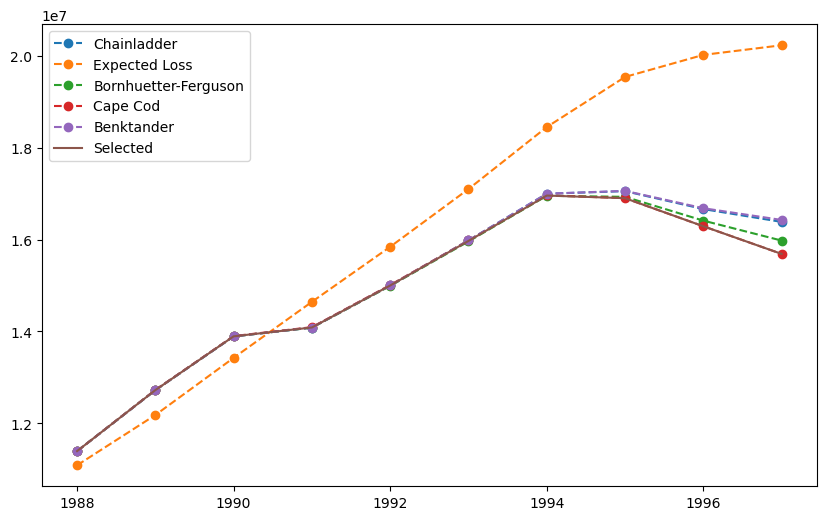

In [92]:
loss_data = clrd["IncurLoss"].sum()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(
    cl_mod.fit(loss_data).ultimate_.to_frame().index.year,
    cl_mod.fit(loss_data).ultimate_.to_frame(),
    label="Chainladder",
    linestyle="dashed",
    marker="o",
)
plt.plot(
    el_mod.fit(loss_data, sample_weight=sample_weight).ultimate_.to_frame().index.year,
    el_mod.fit(loss_data, sample_weight=sample_weight).ultimate_.to_frame(),
    label="Expected Loss",
    linestyle="dashed",
    marker="o",
)
plt.plot(
    bf_mod.fit(loss_data, sample_weight=sample_weight).ultimate_.to_frame().index.year,
    bf_mod.fit(loss_data, sample_weight=sample_weight).ultimate_.to_frame(),
    label="Bornhuetter-Ferguson",
    linestyle="dashed",
    marker="o",
)
plt.plot(
    cc_mod.fit(loss_data, sample_weight=sample_weight).ultimate_.to_frame().index.year,
    cc_mod.fit(loss_data, sample_weight=sample_weight).ultimate_.to_frame(),
    label="Cape Cod",
    linestyle="dashed",
    marker="o",
)
plt.plot(
    bk_mod.fit(loss_data, sample_weight=sample_weight).ultimate_.to_frame().index.year,
    bk_mod.fit(loss_data, sample_weight=sample_weight).ultimate_.to_frame(),
    label="Benktander",
    linestyle="dashed",
    marker="o",
)
plt.plot(
    vot_mod.ultimate_.to_frame().index.year,
    vot_mod.ultimate_.to_frame(),
    label="Selected",
)
plt.legend(loc="best")

Note that it is not possible to use `chainladder.VotingChainladder()` with multiple datasets. For example, blending the ultimate estimate using paid data and the ultimate estimate using incurred data. This strictly follow `scikit-learn` and its model and data implementation philosophy. However, a practitioner is of course free to perform any additional weightening outside of `chainladder`.

## MackChainladder

Now that we know how to run deterministic models from `chainladder`, `chainladder` also has stochastic models. This is where an open-source tool like Python can excel compared to traditional spreadsheet-like analytics tools due to its computational efficiency.

Like the basic Chainladder method, the `chainladder.MackChainladder()` is entirely specified by its selected development pattern. In fact, it is the basic Chainladder model, but with extra features.

In [93]:
cl.Chainladder().fit(clrd["CumPaidLoss"].sum()).ultimate_ == cl.MackChainladder().fit(
    clrd["CumPaidLoss"].sum()
).ultimate_

True

Let's store the model result as `mack_mod` and look at its additional attributes.

In [94]:
mack_mod = cl.MackChainladder().fit(clrd["CumPaidLoss"].sum())
mack_mod

MackChainladder()

`chainladder.MackChainladder()` has the following additional fitted features that the deterministic `chainladder.Chainladder()` does not:
- `full_std_err_`: The full standard error.
- `total_process_risk_`: The total process error.
- `total_parameter_risk_`: The total parameter error.
- `mack_std_err_`: The total prediction error by `origin` period.
- `total_mack_std_err_`: The total prediction error across all `origin` periods.

In [95]:
mack_mod.mack_std_err_

,12,24,36,48,60,72,84,96,108,120,9999
1988,,,,,,,,,,,
1989,,,,,,,,,,"7,613","7,613"
1990,,,,,,,,,"28,691","29,905","29,905"
1991,,,,,,,,"16,179","33,242","34,341","34,341"
1992,,,,,,,"13,979","21,993","37,544","38,639","38,639"
1993,,,,,,"40,597","43,752","47,553","57,500","58,394","58,394"
1994,,,,,"68,320","82,024","84,703","87,438","94,123","94,894","94,894"
1995,,,,"90,704","118,024","128,698","131,635","134,122","139,122","139,873","139,873"
1996,,,"191,747","231,370","253,780","264,492","269,106","272,154","275,877","276,854","276,854"
1997,,"483,824","627,243","701,963","744,029","766,387","778,622","785,791","791,200","793,559","793,559"


Note that these are all measures of uncertainty, and can be extremely useful when you want to run various triangle diagnostics.

Let’s start by examining the link ratios underlying the triangle between age 12 and 24.

In [96]:
clrd_first_lag = clrd[clrd.development <= 24][clrd.origin < "1997"]["CumPaidLoss"].sum()
clrd_first_lag

,12,24
1988,"3,577,780","7,059,966"
1989,"4,090,680","7,964,702"
1990,"4,578,442","8,808,486"
1991,"4,648,756","8,961,755"
1992,"5,139,142","9,757,699"
1993,"5,653,379","10,599,423"
1994,"6,246,447","11,394,960"
1995,"6,473,843","11,612,151"
1996,"6,591,599","11,473,912"


A simple average link-ratio can be directly computed.

In [97]:
clrd_first_lag.link_ratio.to_frame().mean().iloc[0]

1.8782447151772095

Which can be verified with the `chainladder.Development()` object, ignoring the very minor rounding difference.

In [98]:
cl.Development(average="simple").fit(clrd["CumPaidLoss"].sum()).ldf_.to_frame().iloc[
    0, 0
]

1.8782447151772093

### Linear Regression Framework

Mack noted that the estimate for the LDF is really just a linear regression fit. In the case of using the simple average, it is a weighted regression where the weight is $\left (\frac{1}{X} \right )^{2}$.

Let’s take a look at the fitted coefficient and verify that this ties to the direct calculations that we made earlier. With the regression framework in hand, we can get more information about our LDF estimate than just the coefficient.

In [99]:
import statsmodels.api as sm

y = clrd_first_lag.to_frame().values[:, 1]
x = clrd_first_lag.to_frame().values[:, 0]

sm.WLS(y, x, weights=(1 / x) ** 2).fit().summary()

/Users/kennethhsu/opt/anaconda3/envs/cl_dev/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  k, _ = kurtosistest(a, axis)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 WLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.998
Model:                            WLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              5323.
Date:                Mon, 13 May 2024   Prob (F-statistic):                    1.39e-12
Time:                        14:45:06   Log-Likelihood:                         -128.23
No. Observations:                   9   AIC:                                      258.5
Df Residuals:                       8   BIC:                                      258.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.8782      0.026     72.958      0.000       1.819       1.938
==============================================================================
Omnibus:                        1.016   Durbin-Watson:                   0.188
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                0.777
Skew:                          -0.563   Prob(JB):                        0.678
Kurtosis:                       2.103   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

By toggling the weights of our regression, we can handle the most common types of averaging used in picking loss development factors.

- For simple average, the weights are $\left (\frac{1}{X} \right )^{2}$
- For volume-weighted average, the weights are $\left (\frac{1}{X} \right )$
- For “regression” average, the weights are 1

Let's check to see if everything reconciles.

In [100]:
print(
    "Simple average:",
    round(
        cl.Development(average="simple")
        .fit(clrd_first_lag)
        .ldf_.to_frame()
        .values[0, 0],
        10,
    )
    == round(sm.WLS(y, x, weights=(1 / x) ** 2).fit().params[0], 10),
)

print(
    "Volume-weighted average:",
    round(
        cl.Development(average="volume")
        .fit(clrd_first_lag)
        .ldf_.to_frame()
        .values[0, 0],
        10,
    )
    == round(sm.WLS(y, x, weights=(1 / x)).fit().params[0], 10),
)

print(
    "Regression average:",
    round(
        cl.Development(average="regression")
        .fit(clrd_first_lag)
        .ldf_.to_frame()
        .values[0, 0],
        10,
    )
    == round(sm.OLS(y, x).fit().params[0], 10),
)

Simple average: True
Volume-weighted average: True
Regression average: True


The regression framework is what the `chainladder.Development()` estimator uses to set development patterns. Although we discard the information in the deterministic methods, in stochastic methods, `chainladder.Development()` has two useful statistics for estimating reserve variability, both of which come from the regression framework. These statistics are `.sigma_` and `.std_err_`, and they are used by the `chainladder.MackChainladder()` estimator to determine the prediction error of our reserves.

In [101]:
dev = cl.Development(average="simple").fit(clrd["CumPaidLoss"].sum())
dev.sigma_

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120
(All),0.0772,0.0168,0.0066,0.0047,0.0027,0.0009,0.0010,0.0018,0.0004


In [102]:
dev.std_err_

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120
(All),0.0257,0.0060,0.0025,0.0019,0.0012,0.0005,0.0006,0.0013,0.0004


Since the regression framework uses the weighting method, we can easily "turn on and off” any observation we want to include or exclude using the dropping capabilities such as `drop_valuation` in the `chainladder.Development()` estimator. Dropping link ratios not only affects the `.ldf_` and `.cdf_`, but also the `.sigma_` and `.std_err_` of the estimates.

Can we eliminate the 1988 valuation from our triangle, which is identical to eliminating the first observation from our 12-24 regression fit? Let’s calculate the `.std_err_` for the LDF of ages 12-24, and compare it to the value calculated using the weighted least squares regression.

In [103]:
cl.Development(average="volume", drop_valuation="1988").fit(
    clrd["CumPaidLoss"].sum()
).std_err_.to_frame().values[0, 0]

0.02624835706250002

In [104]:
sm.WLS(y[1:], x[1:], weights=(1 / x[1:])).fit().bse[0]

0.026248357062500012

With `.sigma_` and `.std_err_` in hand, Mack goes on to develop recursive formulas to estimate `.parameter_risk_` and `.process_risk_`.

In [105]:
mack_mod.parameter_risk_

,12,24,36,48,60,72,84,96,108,120,9999
1988,0,0,0,0,0,0,0,0,0,0,0
1989,0,0,0,0,0,0,0,0,0,"5,531","5,531"
1990,0,0,0,0,0,0,0,0,"17,349","18,417","18,417"
1991,0,0,0,0,0,0,0,"8,417","19,540","20,533","20,533"
1992,0,0,0,0,0,0,"6,621","11,201","21,928","22,945","22,945"
1993,0,0,0,0,0,"17,897","19,524","21,943","29,942","30,843","30,843"
1994,0,0,0,0,"28,371","34,920","36,282","38,045","43,989","44,758","44,758"
1995,0,0,0,"35,066","46,952","52,091","53,480","54,981","59,558","60,224","60,224"
1996,0,0,"69,383","84,684","93,977","98,629","100,489","101,941","104,934","105,523","105,523"
1997,0,"168,093","219,314","246,052","261,387","269,585","273,954","276,618","279,223","280,150","280,150"


In [106]:
mack_mod.process_risk_

,12,24,36,48,60,72,84,96,108,120,9999
1988,0,0,0,0,0,0,0,0,0,0,0
1989,0,0,0,0,0,0,0,0,0,"5,231","5,231"
1990,0,0,0,0,0,0,0,0,"22,852","23,561","23,561"
1991,0,0,0,0,0,0,0,"13,817","26,893","27,527","27,527"
1992,0,0,0,0,0,0,"12,312","18,927","30,475","31,088","31,088"
1993,0,0,0,0,0,"36,440","39,154","42,187","49,089","49,584","49,584"
1994,0,0,0,0,"62,151","74,219","76,539","78,728","83,211","83,676","83,676"
1995,0,0,0,"83,652","108,283","117,685","120,281","122,335","125,729","126,244","126,244"
1996,0,0,"178,754","215,316","235,738","245,414","249,639","252,340","255,141","255,955","255,955"
1997,0,"453,685","587,652","657,427","696,603","717,407","728,836","735,493","740,292","742,464","742,464"


### Assumption of Independence
The Mack model makes a lot of assumptions about independence (i.e. the covariance between random processes is 0). This means that many of the variance estimates in the `chainladder.MackChainladder()` model follow the form of $Var(A+B) = Var(A)+Var(B)$.

First, `.mack_std_err_`$^{2}$ $=$ `.parameter_risk_`$^2 $ $+$ `.process_risk_`$^{2}$, the parameter risk and process risk are assumed to be independent.

In [107]:
mack_mod.parameter_risk_**2 + mack_mod.process_risk_**2 - mack_mod.mack_std_err_**2

,12,24,36,48,60,72,84,96,108,120,9999
1988,,,,,,,,,,,
1989,,,,,,,,,,-0.0000,-0.0000
1990,,,,,,,,,,0.0000,0.0000
1991,,,,,,,,-0.0000,0.0000,,
1992,,,,,,,,,-0.0000,0.0000,0.0000
1993,,,,,,0.0000,,,0.0000,,
1994,,,,,,,0.0000,0.0000,0.0000,,
1995,,,,,,,-0.0000,0.0000,,0.0000,0.0000
1996,,,,,0.0000,0.0000,,,-0.0000,,
1997,,,0.0001,,,-0.0001,,-0.0001,,,


Second, `.total_process_risk_`$^{2}$ $=$  $\sum_{\text{origin}} $ `.process_risk_`$^{2}$, the process risk is assumed to be independent between origins.

In [108]:
mack_mod.total_process_risk_**2 - (mack_mod.process_risk_**2).sum(axis="origin")

,12,24,36,48,60,72,84,96,108,120,9999
1988,,,,,,0.0001,,-0.0001,,,


Lastly, independence is also assumed to apply to the overall standard error of reserves.

In [109]:
(mack_mod.parameter_risk_**2 + mack_mod.process_risk_**2).sum(axis=2).sum(
    axis=3
) - (mack_mod.mack_std_err_**2).sum(axis=2).sum(axis=3)

0.0

This over-reliance on independence is one of the weaknesses of the `chainladder.MackChainladder()` method. Nevertheless, if the data align with this assumption, then `.total_mack_std_err_` is a reasonable estimator of reserve variability.

### Mack Reserve Variability

The `.mack_std_err_` at ultimate is the reserve variability for each origin period.

In [110]:
mack_mod.mack_std_err_[
    mack_mod.mack_std_err_.development == mack_mod.mack_std_err_.development.max()
]

,9999
1988,
1989,"7,613"
1990,"29,905"
1991,"34,341"
1992,"38,639"
1993,"58,394"
1994,"94,894"
1995,"139,873"
1996,"276,854"
1997,"793,559"


With the `.summary_` attribute, we can more easily look at the result of the `chainladder.MackChainladder()` model.

In [111]:
mack_mod.summary_

,Latest,IBNR,Ultimate,Mack Std Err
1988,"11,203,949",,"11,203,949",
1989,"12,492,899","36,186","12,529,085","7,613"
1990,"13,559,557","119,217","13,678,774","29,905"
1991,"13,642,414","242,415","13,884,829","34,341"
1992,"14,347,271","484,933","14,832,204","38,639"
1993,"15,005,138","946,618","15,951,756","58,394"
1994,"15,249,326","1,854,279","17,103,605","94,894"
1995,"14,010,098","3,418,299","17,428,397","139,873"
1996,"11,473,912","6,094,599","17,568,511","276,854"
1997,"6,451,896","11,967,706","18,419,602","793,559"


(0.0, 20000000.0)

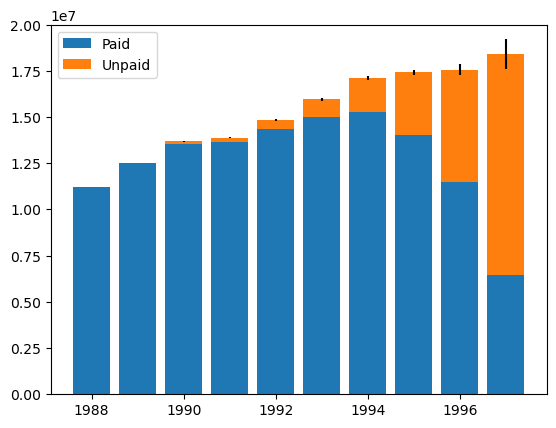

In [112]:
plt.bar(
    mack_mod.summary_.to_frame().index.year,
    mack_mod.summary_.to_frame()["Latest"],
    label="Paid",
)
plt.bar(
    mack_mod.summary_.to_frame().index.year,
    mack_mod.summary_.to_frame()["IBNR"],
    bottom=mack_mod.summary_.to_frame()["Latest"],
    yerr=mack_mod.summary_.to_frame()["Mack Std Err"],
    label="Unpaid",
)
plt.legend(loc="upper left")
plt.ylim(0, 20000000)

In [113]:
mack_mod.summary_

,Latest,IBNR,Ultimate,Mack Std Err
1988,"11,203,949",,"11,203,949",
1989,"12,492,899","36,186","12,529,085","7,613"
1990,"13,559,557","119,217","13,678,774","29,905"
1991,"13,642,414","242,415","13,884,829","34,341"
1992,"14,347,271","484,933","14,832,204","38,639"
1993,"15,005,138","946,618","15,951,756","58,394"
1994,"15,249,326","1,854,279","17,103,605","94,894"
1995,"14,010,098","3,418,299","17,428,397","139,873"
1996,"11,473,912","6,094,599","17,568,511","276,854"
1997,"6,451,896","11,967,706","18,419,602","793,559"


We can also simulate the (assumed) normally distributed IBNR with `np.random.normal()`.

(array([  2.,   2.,   2.,   4.,   9.,  14.,  17.,  39.,  47.,  59.,  90.,
        144., 159., 202., 288., 325., 388., 430., 507., 537., 604., 642.,
        650., 615., 590., 546., 534., 507., 429., 357., 323., 233., 196.,
        171., 113.,  73.,  51.,  36.,  26.,  22.,   5.,   3.,   2.,   2.,
          2.,   0.,   2.,   0.,   0.,   1.]),
 array([21838558.78255578, 21984792.64512774, 22131026.5076997 ,
        22277260.37027166, 22423494.23284362, 22569728.09541558,
        22715961.95798754, 22862195.82055949, 23008429.68313145,
        23154663.54570341, 23300897.40827537, 23447131.27084733,
        23593365.13341929, 23739598.99599125, 23885832.85856321,
        24032066.72113517, 24178300.58370713, 24324534.44627909,
        24470768.30885104, 24617002.171423  , 24763236.03399497,
        24909469.89656692, 25055703.75913888, 25201937.62171084,
        25348171.4842828 , 25494405.34685476, 25640639.20942672,
        25786873.07199868, 25933106.93457064, 26079340.7971426 ,
        

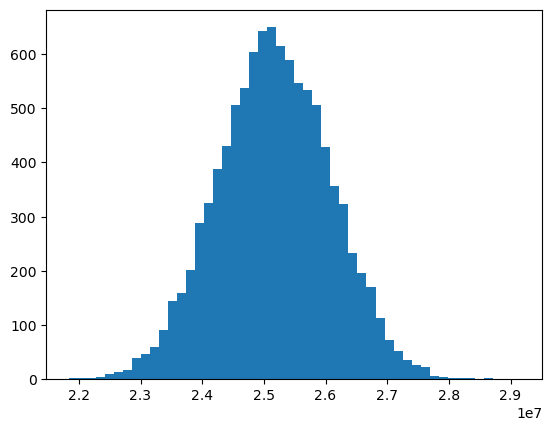

In [114]:
ibnr_mean = mack_mod.ibnr_.sum()
ibnr_sd = mack_mod.total_mack_std_err_.values[0, 0]
n_trials = 10000

np.random.seed(2024)
dist = np.random.normal(ibnr_mean, ibnr_sd, size=n_trials)

plt.hist(dist, bins=50)

## ODP Bootstrap Model

The `chainladder.MackChainladder()` focuses on a regression framework for determining the variability of reserve estimates. An alternative approach is to use the statistical bootstrapping, or sampling from a triangle with replacement to simulate new triangles, which is what `chainladder.BootstrapODPSample()` does.

Bootstrapping imposes less model constraints than the `chainladder.MackChainladder()`, which allows for greater applicability in different scenarios. Sampling new triangles can be accomplished through the `chainladder.BootstrapODPSample()` estimator. This estimator will take a single triangle and simulate new ones from it. To simulate new triangles randomly from an existing triangle, we specify `n_sims` with how many triangles we want to simulate, and access the `resampled_triangles_` attribute to get the simulated triangles. Notice that the shape of `resampled_triangles_` matches `n_sims` at the first index.

In [115]:
samples = (
    cl.BootstrapODPSample(n_sims=10000)
    .fit(clrd_lob.sum()["CumPaidLoss"])
    .resampled_triangles_
)
samples

,Triangle Summary
Valuation:,1997-12
Grain:,OYDY
Shape:,"(10000, 1, 10, 10)"
Index:,[LOB]
Columns:,[CumPaidLoss]


Alternatively, we could use `chainladder.BootstrapODPSample()` to transform our triangle into a resampled set.

The notion of the ODP Bootstrap is that as our simulations approach infinity, we should expect our mean simulation to converge on the basic Chainladder estimate of reserves.

Let’s apply the basic Chainladder to our original triangle and also to our simulated triangles to see whether this holds true.

In [116]:
ibnr_cl = cl.Chainladder().fit(clrd["CumPaidLoss"].sum()).ibnr_.sum()
ibnr_bootstrap = cl.Chainladder().fit(samples).ibnr_.sum("origin").mean()

print(
    "Chainladder's IBNR estimate:",
    ibnr_cl,
)
print(
    "BootstrapODPSample's mean IBNR estimate:",
    ibnr_bootstrap,
)
print("Difference $:", ibnr_cl - ibnr_bootstrap)
print("Difference %:", abs(ibnr_cl - ibnr_bootstrap) / ibnr_cl)

/Users/kennethhsu/Documents/GitHub/chainladder-python/chainladder/tails/base.py:120: RuntimeWarning: overflow encountered in exp
  sigma_ = xp.exp(time_pd * reg.slope_ + reg.intercept_)
/Users/kennethhsu/Documents/GitHub/chainladder-python/chainladder/tails/base.py:124: RuntimeWarning: overflow encountered in exp
  std_err_ = xp.exp(time_pd * reg.slope_ + reg.intercept_)
/Users/kennethhsu/Documents/GitHub/chainladder-python/chainladder/tails/base.py:127: RuntimeWarning: invalid value encountered in multiply
  sigma_ = sigma_ * 0
/Users/kennethhsu/Documents/GitHub/chainladder-python/chainladder/tails/base.py:128: RuntimeWarning: invalid value encountered in multiply
  std_err_ = std_err_* 0


Chainladder's IBNR estimate: 25164252.77609498
BootstrapODPSample's mean IBNR estimate: 25174411.497315083
Difference $: -10158.721220102161
Difference %: 0.00040369651785379196


The difference is small, as expected.

The last thing we will do, is to compare `chainladder.MackChainladder()` against `chainladder.BootstrapODPSample()`. Recall the Mack model is stored as `mack_mod`. We can get its total `ibnr_` and its standard error with `.total_mack_std_err_`. We then simulate 10,000 trials to form a Mack stimulated total IBNR.

In [117]:
ibnr_mean = mack_mod.ibnr_.sum()
ibnr_sd = mack_mod.total_mack_std_err_.values[0, 0]

np.random.seed(2024)
dist = np.random.normal(ibnr_mean, ibnr_sd, size=10000)

/Users/kennethhsu/Documents/GitHub/chainladder-python/chainladder/tails/base.py:120: RuntimeWarning: overflow encountered in exp
  sigma_ = xp.exp(time_pd * reg.slope_ + reg.intercept_)
/Users/kennethhsu/Documents/GitHub/chainladder-python/chainladder/tails/base.py:124: RuntimeWarning: overflow encountered in exp
  std_err_ = xp.exp(time_pd * reg.slope_ + reg.intercept_)
/Users/kennethhsu/Documents/GitHub/chainladder-python/chainladder/tails/base.py:127: RuntimeWarning: invalid value encountered in multiply
  sigma_ = sigma_ * 0
/Users/kennethhsu/Documents/GitHub/chainladder-python/chainladder/tails/base.py:128: RuntimeWarning: invalid value encountered in multiply
  std_err_ = std_err_* 0


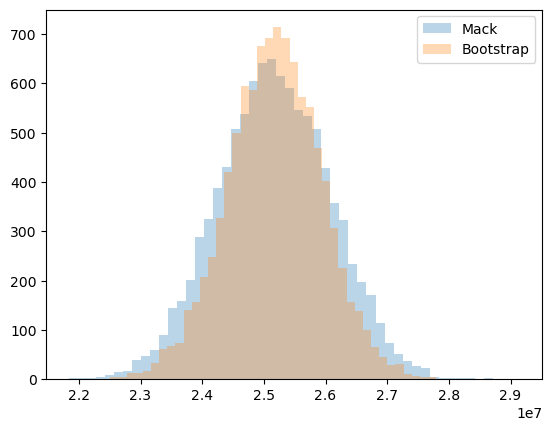

In [118]:
plt.hist(dist, bins=50, label="Mack", alpha=0.3)
plt.hist(
    cl.Chainladder().fit(samples).ibnr_.sum("origin").to_frame(),
    bins=50,
    label="Bootstrap",
    alpha=0.3,
)
plt.legend(loc="upper right")

# Data Preparation Considerations

Even though data preparation is probably the first thing that the practicing actuary needs to perform, we decided to put the discussion here as it will be the piece that will vary the most between users. Here we offer a couple of ideas and suggestions on things that you might want to consider.

## Triangle Data Format

One of the most commonly asked questions is that if the data needs to be in the tabular long format as opposed to the more commonly used triangle format when we are loading the data for use.

Unfortunately, the `chainladder` package requires the data to be in long form.

Suppose you have a wide triangle.

In [119]:
df_raa = cl.load_sample("raa").to_frame()
df_raa

,12,24,36,48,60,72,84,96,108,120
1981-01-01,5012.0,8269.0,10907.0,11805.0,13539.0,16181.0,18009.0,18608.0,18662.0,18834.0
1982-01-01,106.0,4285.0,5396.0,10666.0,13782.0,15599.0,15496.0,16169.0,16704.0,NaN
1983-01-01,3410.0,8992.0,13873.0,16141.0,18735.0,22214.0,22863.0,23466.0,NaN,NaN
1984-01-01,5655.0,11555.0,15766.0,21266.0,23425.0,26083.0,27067.0,NaN,NaN,NaN
1985-01-01,1092.0,9565.0,15836.0,22169.0,25955.0,26180.0,NaN,NaN,NaN,NaN
1986-01-01,1513.0,6445.0,11702.0,12935.0,15852.0,NaN,NaN,NaN,NaN,NaN
1987-01-01,557.0,4020.0,10946.0,12314.0,NaN,NaN,NaN,NaN,NaN,NaN
1988-01-01,1351.0,6947.0,13112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989-01-01,3133.0,5395.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-01,2063.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


You can use `pandas` to `.unstack()` the data into the wide long format.

In [120]:
df_raa = df_raa.unstack().dropna().reset_index()
df_raa.columns = ["age", "origin", "values"]
df_raa.head(10)

,age,origin,values
0,12,1981-01-01,5012.0
1,12,1982-01-01,106.0
2,12,1983-01-01,3410.0
3,12,1984-01-01,5655.0
4,12,1985-01-01,1092.0
5,12,1986-01-01,1513.0
6,12,1987-01-01,557.0
7,12,1988-01-01,1351.0
8,12,1989-01-01,3133.0
9,12,1990-01-01,2063.0


Next, we will need a valuation column (think Schedule P style triangle).

In [121]:
df_raa["valuation"] = (df_raa["origin"].dt.year + df_raa["age"] / 12 - 1).astype(int)
df_raa.head(10)

,age,origin,values,valuation
0,12,1981-01-01,5012.0,1981
1,12,1982-01-01,106.0,1982
2,12,1983-01-01,3410.0,1983
3,12,1984-01-01,5655.0,1984
4,12,1985-01-01,1092.0,1985
5,12,1986-01-01,1513.0,1986
6,12,1987-01-01,557.0,1987
7,12,1988-01-01,1351.0,1988
8,12,1989-01-01,3133.0,1989
9,12,1990-01-01,2063.0,1990


Now, we are ready to load it into the `chainladder` package!

In [122]:
cl.Triangle(
    df_raa, origin="origin", development="valuation", columns="values", cumulative=True
)

,12,24,36,48,60,72,84,96,108,120
1981,"5,012","8,269","10,907","11,805","13,539","16,181","18,009","18,608","18,662","18,834"
1982,106,"4,285","5,396","10,666","13,782","15,599","15,496","16,169","16,704",
1983,"3,410","8,992","13,873","16,141","18,735","22,214","22,863","23,466",,
1984,"5,655","11,555","15,766","21,266","23,425","26,083","27,067",,,
1985,"1,092","9,565","15,836","22,169","25,955","26,180",,,,
1986,"1,513","6,445","11,702","12,935","15,852",,,,,
1987,557,"4,020","10,946","12,314",,,,,,
1988,"1,351","6,947","13,112",,,,,,,
1989,"3,133","5,395",,,,,,,,
1990,"2,063",,,,,,,,,


## Incremental vs Cumulative Triangles

While actuaries are working with cumulative triangles more often, cumulative triangles are actually inferior to incremental triangles when they come to data storage and processing. This is because incremental triangles only have to contain information on any differences, whereas cumulative triangles contain all the information that the incremental triangle has, but will take up more storage space since a data point needs to exist for all valuation period.

Consider the `prism` dataset, which is a claim level dataset with over 13,000 triangles.

In [123]:
prism = cl.load_sample("prism")
prism

,Triangle Summary
Valuation:,2017-12
Grain:,OMDM
Shape:,"(34244, 4, 120, 120)"
Index:,"[ClaimNo, Line, Type, ClaimLiability, Limit, Deductible]"
Columns:,"[reportedCount, closedPaidCount, Paid, Incurred]"


We see that the dataset has a shape of `(34244, 4, 120, 120)` with its size being only approximately `2.8M`.

In [124]:
prism.values

Format,coo
Data Type,float64
Shape,"(34244, 4, 120, 120)"
nnz,121178
Density,6.143513381095148e-05
Read-only,True
Size,2.8M
Storage ratio,0.0


But converting the dataset into cumulative triangle, the size is significantlly larger, by nearly 80 times!

In [125]:
prism.incr_to_cum().values

Format,coo
Data Type,float64
Shape,"(34244, 4, 120, 120)"
nnz,5750047
Density,0.00291517360299939
Read-only,True
Size,219.3M
Storage ratio,0.0


## Sparse Triangles

By default, the `chainladder.Triangle()` is a wrapper around a `numpy` array. `numpy` is optimized for high performance, and this allows `chainladder` to achieve decent computational speeds. However, despite being fast, `numpy` can become memory inefficient with triangle data because triangles are inherently sparse (when memory is being allocated yet no data is stored). This is because the lower half of an incomplete triangle is generally blank and that means about 50% of an array size is allocated yet wasted to store nothing. As we include granular index and column values in our Triangle, the sparsity of the triangle increases, further consuming RAM unnecessarily. `chainladder` automatically eliminates this extraneous consumption of memory by resorting to a sparse array representation when the `chainladder.Triangle()` becomes sufficiently large. Unless you are an expert or are running into RAM issues, it will be uncommon for an end user to have to make these adjustments manually.

## Claim-Level Data

The sparse representation of triangles allows for substantially more data to be pushed through `chainladder`. This gives us some nice capabilities that we would not otherwise be able to do with aggregated data.

This will allow you to drill into the individual claim makeup of any cell in our `chainladder.Triangle()`. 

For example, we can look at all the claims happened in January of 2017, at age 12.

In [126]:
claims = prism[prism.origin == "2017-01"][prism.development == 12].to_frame()
claims[abs(claims).sum(axis="columns") != 0].reset_index()

,ClaimNo,Line,Type,ClaimLiability,Limit,Deductible,reportedCount,closedPaidCount,Paid,Incurred
0,38147,Auto,PD,True,20000.0,1000,1.0,1.0,14540.067710,14540.067710
1,38157,Auto,PD,True,20000.0,1000,1.0,1.0,3873.094721,3873.094721
2,38163,Auto,PD,True,8000.0,1000,1.0,1.0,7000.000000,7000.000000
3,38192,Auto,PD,True,20000.0,1000,1.0,1.0,6451.718210,6451.718210
4,38197,Auto,PD,True,20000.0,1000,1.0,1.0,18222.149160,18222.149160
5,38215,Auto,PD,True,8000.0,1000,1.0,1.0,7000.000000,7000.000000
6,38221,Auto,PD,True,20000.0,1000,1.0,1.0,17844.211120,17844.211120
7,38228,Auto,PD,True,20000.0,1000,1.0,1.0,10262.441970,10262.441970
8,38263,Auto,PD,True,15000.0,1000,1.0,1.0,14000.000000,14000.000000
9,38307,Auto,PD,True,15000.0,1000,1.0,1.0,11901.151660,11901.151660


Or that if we want to cop large losses or create an excess triangle on the fly.

In [127]:
prism["Capped 100k Paid"] = cl.minimum(prism["Paid"], 100000)
prism["Excess 100k Paid"] = prism["Paid"] - prism["Capped 100k Paid"]

We can take this even further, we can create claim-level IBNR estimates.

But first, let's fit a simple Chainladder model using the aggregated data.

In [128]:
agg_data = prism.sum()[["Paid", "reportedCount"]]
cl_mod = cl.Chainladder().fit(agg_data)

In [129]:
cl_ults = cl_mod.predict(prism[["Paid", "reportedCount"]]).ultimate_
cl_ults

,Triangle Summary
Valuation:,2261-12
Grain:,OMDM
Shape:,"(34244, 2, 120, 1)"
Index:,"[ClaimNo, Line, Type, ClaimLiability, Limit, Deductible]"
Columns:,"[Paid, reportedCount]"


Let’s try a Bornhuetter-Ferguson method as well. We will infer an a priori severity from our chainladder model, `cl_mod` above.

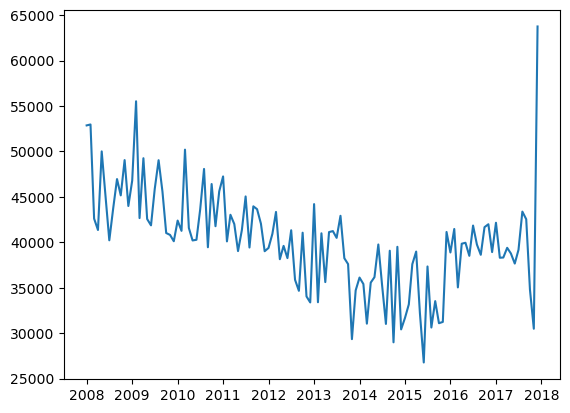

In [130]:
plt.plot(
    (cl_mod.ultimate_["Paid"] / cl_mod.ultimate_["reportedCount"]).to_frame(),
)

There are some trends in the severity, but $40,000 doesn't look like a bad a priori (at least for the last two eyears or so, between 2016 and 2018).

Now, let’s fit an aggregate Bornhuetter-Ferguson model. Like the Chainladder example, we fit the model in aggregate (summing all claims) to create a stable model from which we can generate granular predictions. We will use our Chainladder ultimate claim counts as our sample_weight (exposure) for the Bornhuetter-Ferguson method. Essentially, we are saying for each `reportedCount`, we will assume `40000` each of ultimate severity as the a priori.

In [131]:
paid_bf = cl.BornhuetterFerguson(apriori=40000).fit(
    X=prism["Paid"].sum().incr_to_cum(), sample_weight=cl_ults["reportedCount"].sum()
)

We can now create claim-level Bornhuetter-Ferguson predictions using our claim-level Triangle. 

In [132]:
paid_bf.predict(
    prism["Paid"].incr_to_cum(), sample_weight=cl_ults["reportedCount"]
).ultimate_

,Triangle Summary
Valuation:,2261-12
Grain:,OMDM
Shape:,"(34244, 1, 120, 1)"
Index:,"[ClaimNo, Line, Type, ClaimLiability, Limit, Deductible]"
Columns:,[Paid]


## Consolidating Exposure and Loss Data

Very often, actuaries will use both exposure data and loss data together, instead of just studying and analyzing loss data by itself. Because of this, the practitioner will need to figure out a way to consolidate the data together into a single dataset. This is often more challenging in practice as one would have to first worry about pulling data from difference data systems, and consolidating them together after.

When it comes to consolidating the data, you most likely will choose one of these two options.

### Exposure and Loss Data as Columns

The `clrd` dataset is prepared this way, where exposure and loss data sit side-by side.

In [133]:
cl.load_sample("clrd").to_frame().reset_index()

,GRNAME,LOB,origin,development,IncurLoss,CumPaidLoss,BulkLoss,EarnedPremDIR,EarnedPremCeded,EarnedPremNet
0,Adriatic Ins Co,othliab,1995-01-01,12,8.0,NaN,8.0,139.0,131.0,8.0
1,Adriatic Ins Co,othliab,1995-01-01,24,11.0,NaN,4.0,139.0,131.0,8.0
2,Adriatic Ins Co,othliab,1995-01-01,36,7.0,3.0,4.0,139.0,131.0,8.0
3,Adriatic Ins Co,othliab,1996-01-01,12,40.0,NaN,40.0,410.0,359.0,51.0
4,Adriatic Ins Co,othliab,1996-01-01,24,40.0,NaN,40.0,410.0,359.0,51.0
...,...,...,...,...,...,...,...,...,...,...
33084,Yel Co Ins,comauto,1995-01-01,36,282.0,37.0,102.0,403.0,NaN,403.0
33085,Yel Co Ins,comauto,1996-01-01,12,707.0,40.0,495.0,996.0,NaN,996.0
33086,Yel Co Ins,comauto,1996-01-01,24,699.0,60.0,502.0,996.0,NaN,996.0
33087,Yel Co Ins,comauto,1997-01-01,12,698.0,25.0,506.0,996.0,NaN,996.0


### Stacking Exposure and Loss Data on Top of Each Other
Another option is that you can stack the loss data on top of exposure data, or vice versa.

Some of the benefits include:
- Not having to allocate or map exposure and loss amounts one to one.
- The data can be prepared easier, since exposure and loss data generally sits in two separate data warehouses.

However, some drawbacks include:
- The table will be twice as long, or longer.
- Your table will contain a lot of empty cells, which may or may not be a problem.
- You already have to think about how to map exposures and losses, as required by some models.

## How Much Data Should I Load?

Of course, there's no need to have "everything" loaded into the RAM, even though `chainladder` is designed to handle multiple triangles at once.

The amount of data you should load into your system for analysis depends on several factors, including the objectives of your analysis, and the computational resources available. Generally, it is advisable to start with the simpliest dataset that is just enough to capture the problem that you are trying to analyze. For example, even though loading claim level data *might* be useful, there's no need to keep the data at that level of detail in your first go.

Keeping things small allows you to test your analysis methods, identify potential issues, and make adjustments without committing excessive resources upfront. As you refine your methods and increase your system’s capacity, you can progressively scale up the amount of data you analyze. Ultimately, the goal is to use a dataset that is sufficient to achieve reliable and statistically significant results, while efficiently using your resources.